![iscap_logo](https://www.iscap.ipp.pt/logo-ipp.png)

**Pós-Graduação em Business Analytics** (2024-25)

Trabalho de **Natural Language Processing**

Identificação do grupo

| nome | número de aluno |
|------|--------------|
|Ana Rita Maganinho|2180332|
|Bárbara Pedrosa|2240510|
|Liliana Gestosa|2240516|

#### Atualizações e importações necessárias

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 9.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
!pip install --force-reinstall -v numpy==1.26.4

Using pip 24.1.2 from /usr/local/lib/python3.11/dist-packages/pip (python 3.11)
  Link requires a different Python (3.11.12 not in: '>=3.7,<3.11'): https://files.pythonhosted.org/packages/3a/be/650f9c091ef71cb01d735775d554e068752d3ff63d7943b26316dc401749/numpy-1.21.2.zip (from https://pypi.org/simple/numpy/) (requires-python:>=3.7,<3.11)
  Link requires a different Python (3.11.12 not in: '>=3.7,<3.11'): https://files.pythonhosted.org/packages/5f/d6/ad58ded26556eaeaa8c971e08b6466f17c4ac4d786cd3d800e26ce59cc01/numpy-1.21.3.zip (from https://pypi.org/simple/numpy/) (requires-python:>=3.7,<3.11)
  Link requires a different Python (3.11.12 not in: '>=3.7,<3.11'): https://files.pythonhosted.org/packages/fb/48/b0708ebd7718a8933f0d3937513ef8ef2f4f04529f1f66ca86d873043921/numpy-1.21.4.zip (from https://pypi.org/simple/numpy/) (requires-python:>=3.7,<3.11)
  Link requires a different Python (3.11.12 not in: '>=3.7,<3.11'): https://files.pythonhosted.org/packages/c2/a8/a924a09492bdfee8c2ec3094d0

In [ ]:
!pip install emoji

In [ ]:
# importar libraries

import pandas as pd
import numpy as np
import re
import os
import datetime

# para pré-processamento
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import emoji
from wordcloud import WordCloud, STOPWORDS

# para visualização
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
from tabulate import tabulate

# para o modelo
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight #
from imblearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
# download recursos NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# ler csv "Tweets.csv"

df = pd.read_csv("Tweets.csv")

# Parte 1


<details>
<summary><strong> 📥 1º email recebido - A Rachel entrou na empresa US Airways como Data Scientist.  </strong> (Expandir)</summary>

> Welcome to the US Airways family.
Everyone is looking forward to finally meeting you, especially Michelle (our Chief Digital Officer). The early incorporation of a Data Scientist into the team has been one of her priorities. She considers you a key element to transform US Airways into a “data driven” company. She has a lot of ideas for your initial months with us. I’m sure you will be hearing from her very soon.
I wish you a great start in the new job. If there is anything I can help with, please let me know.
See you soon,
Justin
</details>

<details>
<summary><strong> 📥 2º email receido - Michelle (CDO) dá acesso ao dataset </strong> (Expandir)</summary>

> First of all, welcome to US Airways!
I have already requested access for you to the company's data warehouse, our data collection department has been monitoring all tweets about our company and competitors.
I suggest you start looking at this dataset to familiarise yourself with the business.
See you soon!
M
</details>

<details>
<summary><strong> 📥 3º email recebido - Primeira tarefa: Popularidade e Problemas a melhorar </strong> (Expandir)</summary>

> Hello Rachel, Now that you are more familiar with our data. I have a few questions I would like you to help me with:
* How is our company's twitter popularity in relation to our direct competitors?
* Can you identify what issues we should focus on to try to improve customer
satisfaction?

> Thanks in advance!
 M
</details>

## Informações iniciais do dataset

<details>
<summary><strong> Informações do dataset </strong> (Expandir)</summary>

No primeiro contacto com o dataset, explorou-se a sua forma, estrutura e valores. Fez-se, ainda, uma Análise de Dados Exploratória muito inicial.

*Conjunto de Dados:* *Tweets.csv*

*Tamanho:* 14.640 tweets.

*Colunas (15):*
* tweet_id: Identificador único do tweet.
* airline_sentiment: Sentimento (positivo, neutro, negativo).
* airline_sentiment_confidence: Confiança na classificação do sentimento.
* negativereason: Motivo do sentimento negativo.
* negativereason_confidence: Confiança no motivo negativo.
* airline: Companhia aérea.
* airline_sentiment_gold: Sentimento de referência.
* name: Nome do user.
* negativereason_gold: Motivo negativo de referência.
* retweet_count: Número de retweets do tweet.
* text: Conteúdo do tweet.
* tweet_coord: Coordenadas geográficas.
* tweet_created: Data e hora de criação do tweet.
* tweet_location: Localização do user.
* user_timezone: Fuso horário do user.

*Características:*
* Dados textuais e de engagement.
* Informações contextuais (localização, fuso horário).
* Classificações de sentimento e motivos negativos.
* Valores de confiança das classificações.

*Utilidade:* Análise de sentimentos sobre a nossa companhia aérea e comparação com as concorrentes.

*Observações:* 36 linhas duplicadas e vários valores em falta em 7 colunas (negativereason, negativereason_confidence, airline_sentiment_gold, negativereason_gold, tweet_coord, tweet_location e user_timezone).

Reune tweets publicados num período de 9 dias, entre as 23:36 de 16/02/2015 e as 9:59 de 24/02/2015.
</details>

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
df.shape

print(f"O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

O dataset possui 14640 linhas e 15 colunas.


### Estatísticas descritivas

In [ ]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791092e+14,0.162830,0.330440,0.745778
min,5.675880e+17,0.335000,0.000000,0.000000
25%,5.685590e+17,0.692300,0.360600,0.000000
50%,5.694780e+17,1.000000,0.670600,0.000000
75%,5.698902e+17,1.000000,1.000000,0.000000
max,5.703110e+17,1.000000,1.000000,44.000000


In [ ]:
df.describe(include="object")

,airline_sentiment,negativereason,airline,airline_sentiment_gold,name,negativereason_gold,text,tweet_coord,tweet_created,tweet_location,user_timezone
count,14640,9178,14640,40,14640,32,14640,1019,14640,9907,9820
unique,3,10,6,3,7701,13,14427,832,6804,3081,85
top,negative,Customer Service Issue,United,negative,JetBlueNews,Customer Service Issue,@united thanks,"[0.0, 0.0]",2/22/2015 14:22,"Boston, MA",Eastern Time (US & Canada)
freq,9178,2910,3822,32,63,12,6,164,11,157,3744


<details>

<summary><strong> Análise de estatísticas descritivas  </strong> (Insights)</summary>

> Analisando de forma geral a tabela de estatísticas descritivas das **variáveis numéricas** do modelo, observa-se o seguinte:

*   As métricas associadas à coluna `tweeet_id` não têm interpretação no contexto do problema visto que este atributo é apenas um identificador único de cada tweet da base de dados


*   A média da variável `airline_sentiment_confidence` é 0.9, o que indica um elevado grau de confiança nos sentimentos atribuídos aos tweets (positivo, negativo, neutro). Além disso, 75% dos tweets têm um índice de confiança igual a 1.


*   Considerando a variável `negativereason_confidence`, a média desce para cerca de 0.64%. A amplitude de valores é considerável: mínimo é 0, enquanto que 75% dos tweets têm índice de sentimento negativo 1.

*   O número máximo de partilhas (retweets) para um tweet foi 44. No entanto, grande parte das publicações não tiveram qualquer interação: a mediana, o percentil 25 e o percentil 75 são iguais a 0.


Relativamente a **variáveis categóricas**:


*   Dos 14.640 tweets do dataset, 9178 têm sentimentos negativos. Este desbalanceamento de classes pode ser justificado pelo contexto: as pessoas têm mais tendência a partilhar o seu feedback se tiverem uma experiência que percecionaram como negativa.

*   O problema mais reportado nos tweets com sentimento negativo é o atendimento ao cliente (**customer service**).

*   O dataset tem 7701 utilizadores distintos e mais de 14000 tweets únicos, o que reforça a ideia de que grande parte dos tweets provém de utilizadores reais e não de bots.

</details>

### Valores em falta

In [ ]:
# soma dos missing values

df.isnull().sum()

,0
tweet_id,0
airline_sentiment,0
airline_sentiment_confidence,0
negativereason,5462
negativereason_confidence,4118
airline,0
airline_sentiment_gold,14600
name,0
negativereason_gold,14608
retweet_count,0


<details>
<summary><strong> Análise de valores em falta  </strong> (Insights)</summary>

Existem vários valores em falta em 7 colunas: `negativereason`, `negativereason_confidence`, `airline_sentiment_gold`, `negativereason_gold`, `tweet_coord`, `tweet_location` e `user_timezone`.

Estes valores são justificados por nem todos os tweets serem negativos e, em consequência, não terem motivos de queixa ou nível de confiança. O mesmo se aplica para os casos "gold". Adicionalmente, também não existem dados referentes a todas as coordenadas, localização e timezone dos tweets e utilizadores.

Estes valores acabaram por não ser relevantes para as tarefas desenvolvidas.

### Valores duplicados

In [ ]:
# confirmar duplicados

df.duplicated().sum()

np.int64(36)

In [ ]:
# ver as linhas duplicadas para confirmar
duplicated_rows = df[df.duplicated(keep=False)]

# ordenar para facilitar a visualização
duplicated_rows = duplicated_rows.sort_values(by=list(df.columns))

# mostrar as linhas duplicadas
duplicated_rows

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
12001,5.702720e+17,neutral,1.0,NaN,NaN,American,NaN,pokecrastinator,NaN,0,@AmericanAir I thought all those planes were r...,NaN,2/24/2015 9:20,United States,Mountain Time (US & Canada)
12162,5.702720e+17,neutral,1.0,NaN,NaN,American,NaN,pokecrastinator,NaN,0,@AmericanAir I thought all those planes were r...,NaN,2/24/2015 9:20,United States,Mountain Time (US & Canada)
11998,5.702730e+17,positive,1.0,NaN,NaN,American,NaN,ESPartee,NaN,0,"@americanair new plane, #gogo, easy power for ...","[0.0, 0.0]",2/24/2015 9:23,"alexandria, va",Eastern Time (US & Canada)
12159,5.702730e+17,positive,1.0,NaN,NaN,American,NaN,ESPartee,NaN,0,"@americanair new plane, #gogo, easy power for ...","[0.0, 0.0]",2/24/2015 9:23,"alexandria, va",Eastern Time (US & Canada)
11996,5.702740e+17,positive,1.0,NaN,NaN,American,NaN,GoldensPleasure,NaN,0,@AmericanAir Aww Thanks AA..DFW was on GMA up ...,NaN,2/24/2015 9:27,East Coast CT.,Central Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12063,5.703030e+17,neutral,1.0,NaN,NaN,American,NaN,trentgillaspie,NaN,0,.@AmericanAir just disappointed with the Fligh...,NaN,2/24/2015 11:24,"Austin, but often Denver",Mountain Time (US & Canada)
11898,5.703050e+17,neutral,1.0,NaN,NaN,American,NaN,Chandrafaythe,NaN,0,@AmericanAir my flight got Cancelled Flightled...,NaN,2/24/2015 11:31,NaN,Quito
12059,5.703050e+17,neutral,1.0,NaN,NaN,American,NaN,Chandrafaythe,NaN,0,@AmericanAir my flight got Cancelled Flightled...,NaN,2/24/2015 11:31,NaN,Quito
11879,5.703080e+17,negative,1.0,Customer Service Issue,1.0,American,NaN,SweeLoTmac,NaN,0,@AmericanAir why would I even consider continu...,NaN,2/24/2015 11:44,NaN,Quito


In [ ]:
# apagar duplicados

df = df.drop_duplicates()
df.shape

(14604, 15)

<details>
<summary><strong> Linhas duplicadas  </strong> (Insights)</summary>

Existem 36 linhas duplicadas no dataset, que foram eliminadas.

### Período de análise

<details>
<summary><strong> Período de análise do dataset  </strong> (Expandir)</summary>

O dataset abrange um período de 9 dias, o que nos dá uma visão de uma janela temporal curta e pode impactar os resultados obtidos por vários motivos, entre os quais:

*   Picos de insatisfação causados por fenómenos pontuais tais como avarias técnicas fenómenos atmosféricos adversos que possam afetar o normal funcionamento dos voos.

*   Campanhas de marketing que as companhias aéreas possam ter em curso durante o período de estudo


Desta forma, a base de dados não permite retirar insights robustos sobre a experiência contínua dos clientes, limitando-se a um curto prazo de tempo


In [ ]:
inicio = df['tweet_created'].min()
fim = df['tweet_created'].max()

print(f"O dataset atual reune tweets de 9 dias, desde {inicio} a {fim}")

O dataset atual reune tweets de 9 dias, desde 2/16/2015 23:36 a 2/24/2015 9:59


## Pergunta 1: How is our company's Twitter popularity in relation to our direct competitors?

Para analisar a popularidade da companhia aérea em estudo face à concorrência direta, serão observadas várias métricas como o volume de tweets e a sua respetiva análise de sentimentos.

Adicionalmente, será feita uma breve referência a indicadores de engagement, como o número de partilhas, assim como à diversidade de utilizadores a publicar sobre as companhias aéreas no twitter.

De notar que em vez de considerar apenas os volumes absolutos das distribuições, que podem variar bastante consoante a dimensão da empresa no conjunto de dados, optamos por valores normalizados.

### Distribuição Geral por Sentimentos

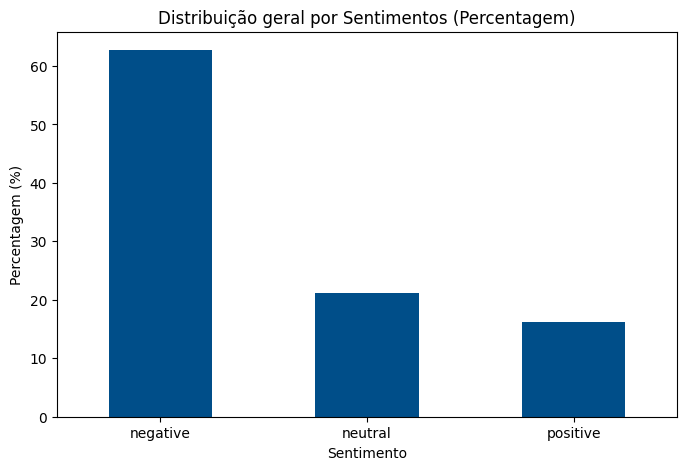

In [ ]:
# gráfico com contagem sentimentos negativos, neutros e positivos (normalizado)
brand_color = "#004E89"

plt.figure(figsize=(8, 5))
(df["airline_sentiment"].value_counts(normalize=True) * 100).plot(kind="bar", color=brand_color)  # Normalizado e multiplicado por 100 para percentagem
plt.title("Distribuição geral por Sentimentos (Percentagem)")
plt.xlabel("Sentimento")
plt.ylabel("Percentagem (%)")
plt.xticks(rotation=0)
plt.show()

<details>
<summary><strong> Distribuição geral por Sentimentos (Percentagem) </strong> (Insights)</summary>

O gráfico acima mostra a distribuição dos tweets por sentimentos, em percentagem. Observa-se que:

*   Mais de metade dos tweets têm sentimentos negativos (cerca de 60%).

*   Tweets com sentimento neutro representam cerca de 20% do total

*   Os tweets com sentimento positivo têm a percentagem mais baixa (cerca de 15%)

Os dados sugerem que os clientes de companhias aéreas utilizam o twitter maioritariamente como um canal de reclamação.


### Volume de tweets por Airline

In [ ]:
# Popularidade

# volume de menções (contagem de tweets) por companhia

df.groupby("airline")["text"].count().sort_values(ascending=False)

,text
airline,
United,3822
US Airways,2913
American,2723
Southwest,2420
Delta,2222
Virgin America,504


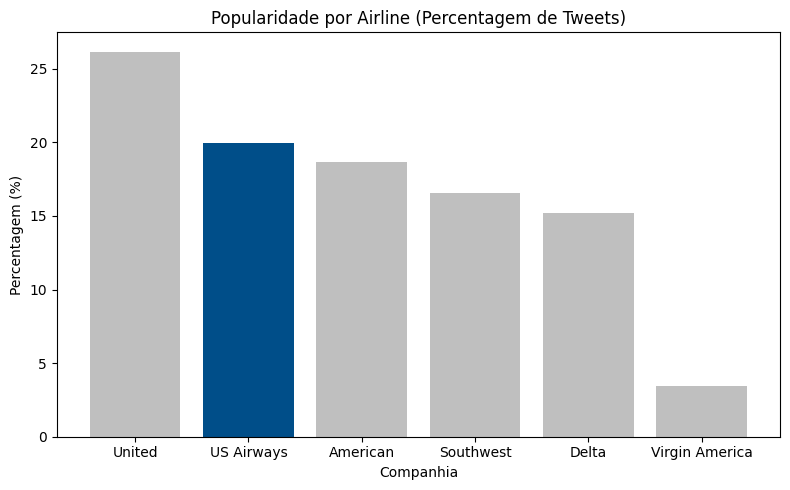

In [ ]:
# Calcular a contagem de tweets por companhia aérea
airline_counts = df["airline"].value_counts()

# Calcular as percentagens
total_tweets = airline_counts.sum()
airline_percentages = (airline_counts / total_tweets) * 100

# Criar o gráfico de barras com as percentagens
plt.figure(figsize=(8, 5))

# Definir cores personalizadas, com destaque para a US Airways
colors = ['#bfbfbf'] * len(airline_percentages)  # Cinza para todas as companhias
colors[np.where(airline_percentages.index == 'US Airways')[0][0]] = '#004E89'  # Azul para US Airways

plt.bar(airline_percentages.index, airline_percentages.values, color=colors)
plt.title("Popularidade por Airline (Percentagem de Tweets)")
plt.xlabel("Companhia")
plt.ylabel("Percentagem (%)")
plt.xticks(rotation=0)  # Manter os rótulos do eixo x na horizontal
plt.tight_layout()  # Ajustar o layout para evitar sobreposição de elementos
plt.show()

<details>
<summary><strong> Popularidade por Airline (Percentagem de Tweets)</strong> (Insights)</summary>

O gráfico acima mostra a distribuição dos tweets por airline, em percentagem, não incluindo informações sobre o sentimento associado aos tweets.
Observa-se o seguinte:

*   United Airlines é a companhia mais mencionada, representando entre 25% a 30% dos tweets totais.

*   Segue-se a companhia aérea em estudo, US Airways, que é mencionada em aproximadamente 20% dos tweets.

*   American, Soutwest e Delta surgem a partir do terceiro lugar com valores entre 15% a 20% de tweets.

*   Virgin America é a companhia menos mencionada

Numa análise preliminar, os dados sugerem que United Airlines e US Airways serão as companhias aéreas mais populares, uma vez que são as mais mencionadas. Contudo, mais menções não se traduz necessariamente numa boa reputação junto dos clientes, pelo que é importante introduzir a análise de sentimento.

### Estatísticas descritivas por Airline

In [ ]:
# Estatísticas descritivas por companhia
pd.set_option("display.max_columns", None)
df.groupby("airline").describe()

tweet_id                                            \
                  count          mean           std           min   
airline                                                             
American         2723.0  5.699071e+17  2.336126e+14  5.682650e+17   
Delta            2222.0  5.690478e+17  7.760109e+14  5.675880e+17   
Southwest        2420.0  5.689358e+17  7.965050e+14  5.675940e+17   
US Airways       2913.0  5.691208e+17  7.676284e+14  5.676430e+17   
United           3822.0  5.690949e+17  7.515808e+14  5.675910e+17   
Virgin America    504.0  5.690294e+17  7.673363e+14  5.677260e+17   

                                                                        \
                         25%           50%           75%           max   
airline                                                                  
American        5.696840e+17  5.698950e+17  5.700880e+17  5.703080e+17   
Delta           5.684138e+17  5.691760e+17  5.696790e+17  5.703090e+17   
Southwest       5.681880e+17  5.689135e+17  5.696392e+17  5.703090e+17   
US Airways      5.684800e+17  5.693180e+17  5.697160e+17  5.703110e+17   
United          5.684910e+17  5.692195e+17  5.697100e+17  5.703080e+17   
Virgin America  5.684392e+17  5.690215e+17  5.696680e+17  5.703060e+17   

               airline_sentiment_confidence                              \
                                      count      mean       std     min   
airline                                                                   
American                             2723.0  0.916259  0.150675  0.3367   
Delta                                2222.0  0.869878  0.176653  0.3363   
Southwest                            2420.0  0.886516  0.170089  0.3353   
US Airways                           2913.0  0.921578  0.149996  0.3400   
United                               3822.0  0.900878  0.162827  0.3350   
Virgin America                        504.0  0.876086  0.172917  0.3482   

                                        negativereason_confidence            \
                     25%  50%  75%  max                     count      mean   
airline                                                                       
American        1.000000  1.0  1.0  1.0                    2171.0  0.663520   
Delta           0.674200  1.0  1.0  1.0                    1184.0  0.573097   
Southwest       0.683175  1.0  1.0  1.0                    1445.0  0.601508   
US Airways      1.000000  1.0  1.0  1.0                    2470.0  0.687172   
United          0.693175  1.0  1.0  1.0                    3000.0  0.627285   
Virgin America  0.678900  1.0  1.0  1.0                     233.0  0.556985   

                                                             retweet_count  \
                     std  min      25%      50%     75%  max         count   
airline                                                                      
American        0.319006  0.0  0.37545  0.67410  1.0000  1.0        2723.0   
Delta           0.354259  0.0  0.34455  0.66170  1.0000  1.0        2222.0   
Southwest       0.353391  0.0  0.35060  0.66520  1.0000  1.0        2420.0   
US Airways      0.307860  0.0  0.62235  0.67770  1.0000  1.0        2913.0   
United          0.324784  0.0  0.35725  0.66805  1.0000  1.0        3822.0   
Virgin America  0.360480  0.0  0.34120  0.66300  0.7223  1.0         504.0   

                                                              
                    mean       std  min  25%  50%  75%   max  
airline                                                       
American        0.042600  0.306109  0.0  0.0  0.0  0.0   5.0  
Delta           0.113411  1.074325  0.0  0.0  0.0  0.0  31.0  
Southwest       0.059917  0.549460  0.0  0.0  0.0  0.0  22.0  
US Airways      0.085479  1.172269  0.0  0.0  0.0  0.0  44.0  
United          0.110152  0.368416  0.0  0.0  0.0  0.0   7.0  
Virgin America  0.051587  0.347266  0.0  0.0  0.0  0.0   4.0

In [ ]:
pd.set_option("display.max_columns", None)
df.groupby("airline").describe(include="object")

airline_sentiment                        negativereason         \
                           count unique       top  freq          count unique   
airline                                                                         
American                    2723      3  negative  1941           1941     10   
Delta                       2222      3  negative   955            955     10   
Southwest                   2420      3  negative  1186           1186     10   
US Airways                  2913      3  negative  2263           2263     10   
United                      3822      3  negative  2633           2633     10   
Virgin America               504      3  negative   181            181     10   

                                            airline_sentiment_gold         \
                                   top freq                  count unique   
airline                                                                     
American        Customer Service Issue  762                     14      2   
Delta                      Late Flight  269                      7      1   
Southwest       Customer Service Issue  391                      8      3   
US Airways      Customer Service Issue  811                      3      2   
United          Customer Service Issue  681                      8      2   
Virgin America  Customer Service Issue   60                      0      0   

                               name                             \
                     top freq count unique            top freq   
airline                                                          
American        negative   11  2723   1305        otisday   28   
Delta           negative    7  2222   1136    JetBlueNews   62   
Southwest       negative    5  2420   1622  scoobydoo9749   21   
US Airways      negative    2  2913   1473       rossj987   23   
United          negative    7  3822   1989       throthra   27   
Virgin America       NaN  NaN   504    394        wmrrock    9   

               negativereason_gold         \
                             count unique   
airline                                     
American                        11      5   
Delta                            7      6   
Southwest                        5      3   
US Airways                       2      2   
United                           7      7   
Virgin America                   0      0   

                                                               text         \
                                                     top freq count unique   
airline                                                                      
American                          Customer Service Issue    7  2723   2594   
Delta                                   Cancelled Flight    2  2222   2211   
Southwest                         Customer Service Issue    3  2420   2408   
US Airways                                    Can't Tell    1  2913   2906   
United          Late Flight\nFlight Attendant Complaints    1  3822   3805   
Virgin America                                       NaN  NaN   504    503   

                                            tweet_coord                     \
                                   top freq       count unique         top   
airline                                                                      
American           @AmericanAir thanks    5         179    160  [0.0, 0.0]   
Delta                 @JetBlue thanks!    5         160    114  [0.0, 0.0]   
Southwest           @SouthwestAir sent    5         160    139  [0.0, 0.0]   
US Airways        @USAirways thank you    3         150    126  [0.0, 0.0]   
United                  @united thanks    6         319    269  [0.0, 0.0]   
Virgin America  @VirginAmerica Thanks!    2          47     29  [0.0, 0.0]   

                    tweet_created                              tweet_location  \
               freq         count unique              top freq          count   
airline               

<details>
<summary><strong> Análise de estatísticas descritivas por Airline</strong> (Insights)</summary>

As tabelas acima mostram as estatísticas descritivas por companhia aérea, quer para variáveis numéricas como categóricas.

A variável `tweet_id` não tem interpretação visto que representa identificadores numéricos únicos para cada tweet da base de dados.

Relativamente às **variáveis numéricas**, observa-se o seguinte:
* A variável `airline_sentiment_confidence` apresenta médias elevadas (entre 0.87 e 0.92), o que indica altos valores de confiança nos sentimentos atribuídos aos tweets (positivo, neutro, negativo). **US Airways** e **American** apresentam os valores mais altos.

* A **US Airways** é a companhia com a média mais alta para a variável `negativereason_confidence` - cerca de 0.687. Trata-se de uma variável que atribui uma pontuação ao nível de confiança na classificação de um tweet com sentimento negativo. Este valor sugere que os problemas são identificados pelos clientes com clareza.
**Virgin America** e **Delta**, por outro lado, apresentam os valores médios mais baixos, o que pode indicar menor volume de tweets negativos ou maior ambiguidade na natureza das queixas.

Relativamente a **variáveis categóricas**:
* Atendimento ao cliente é o problema mais reportado para quase todas as companhias

* Grande parte dos utilizadores está localizado em cidades como Nova Iorque, Washington, San Francisco ou Nashville. O fuso horário mais comum é Eastern Time (US & Canada)

Nesta análise, a **US Airways** destaca-se tanto pela clareza das queixas como pelo volume de tweets com sentimento negativo, o que sugere a necessidade de uma análise mais profunda.

### Distribuição de Sentimentos por Airline

In [ ]:
# Calculate the counts of negative reasons by airline
reason_counts = df.groupby("airline")["negativereason"].value_counts()

# Convert the result to a DataFrame for easier manipulation
reason_counts_df = reason_counts.unstack(fill_value=0)  # fill_value=0 handles missing values

# Calculate the percentage for each reason within each airline
reason_percentages = reason_counts_df.div(reason_counts_df.sum(axis=1), axis=0) * 100

# Format the percentages with "%" symbol and two decimal places
formatted_percentages = reason_percentages.applymap(lambda x: f"{x:.2f}")

# Display the formatted percentage DataFrame
formatted_percentages

<ipython-input-33-b70a55b4288d>:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_percentages = reason_percentages.applymap(lambda x: f"{x:.2f}")


negativereason,Bad Flight,Can't Tell,Cancelled Flight,Customer Service Issue,Damaged Luggage,Flight Attendant Complaints,Flight Booking Problems,Late Flight,Lost Luggage,longlines
airline,,,,,,,,,,
American,4.48,10.20,12.47,39.26,0.62,4.43,6.70,12.57,7.52,1.75
Delta,6.70,19.48,5.34,20.84,1.15,6.28,4.61,28.17,5.97,1.47
Southwest,7.59,13.41,13.66,32.97,1.18,3.20,5.14,12.82,7.59,2.45
US Airways,4.60,10.87,8.35,35.84,0.49,5.44,5.39,20.02,6.81,2.21
United,8.20,14.39,6.87,25.86,0.84,6.38,5.47,19.94,10.22,1.82
Virgin America,10.50,12.15,9.94,33.15,2.21,2.76,15.47,9.39,2.76,1.66


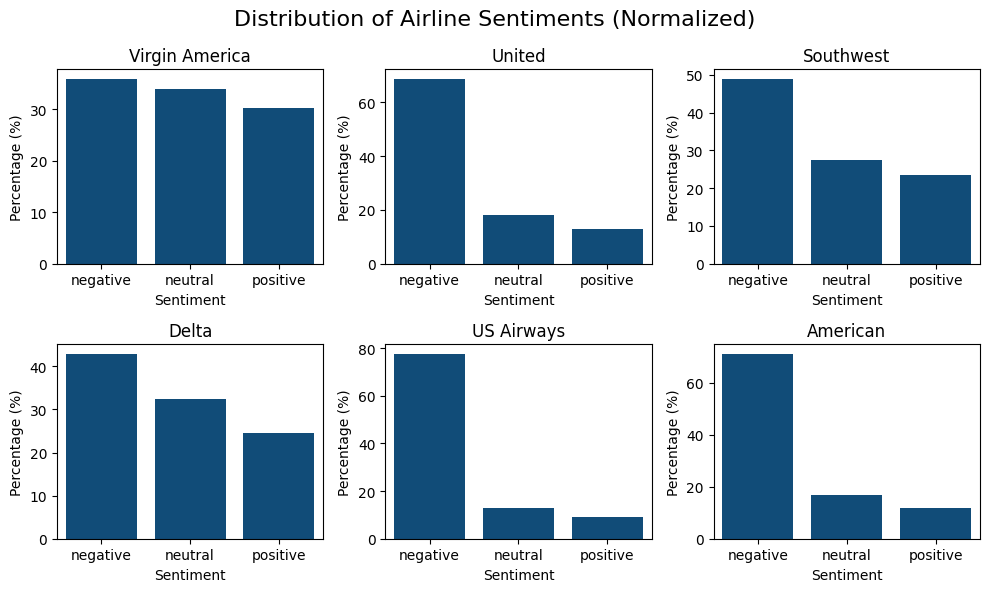

In [ ]:
# gráficos de sentimentos para cada airline (com %)

fig, axs = plt.subplots(2, 3, figsize=(10, 6))
axs = axs.flatten()

for i, airline in enumerate(df["airline"].unique()):
    data = df[df["airline"] == airline]["airline_sentiment"].value_counts(normalize=True) * 100  # Percentagem
    sns.barplot(x=data.index, y=data.values, ax=axs[i], order=["negative", "neutral", "positive"], color=brand_color)
    axs[i].set_title(airline)
    axs[i].set_xlabel("Sentiment")
    axs[i].set_ylabel("Percentage (%)")

plt.suptitle("Distribution of Airline Sentiments (Normalized)", fontsize=16)
plt.tight_layout()
plt.show()


<details>
<summary><strong> Análise dos sentimentos por Airline (Percentagem de Tweets)</strong> (Insights)</summary>

O gráfico acima mostra a distribuição normalizada de sentimentos dos tweets por companhia aérea. Analisando os resultados, observa-se o seguinte:

*  A **US Airways** parece ter a pior perceção entre as companhias aéreas, com cerca de 80% de tweets negativos e quase nenhuma menção positiva. **United** e **American** seguem-se com aproximadamente 60% de tweets negativos e poucas menções positivas/neutras (abaixo dos 20%).

*   **Virgin America** apresenta a distribuição mais equilibrada entre sentimentos: cerca de 35% dos tweets são negativos ou neutros e aproximadamente 30% dos tweets têm sentimentos positivos. É a companhia com perceção mais favorável por parte dos clientes, apresentando a maior percentagem de tweets com sentimentos positivos.


*   **Delta** e **Soutwest** têm um maior equilírio entre sentimentos que **US Airways** e **United**, embora exista espaço para melhoria comparativamente à companhia Virgin America.


Assim, a **US Airways** precisa de implementar medidas para melhorar o serviço e, consequentemente, a perceção dos clientes a seu respeito.


### Distribuição de queixas por Airline

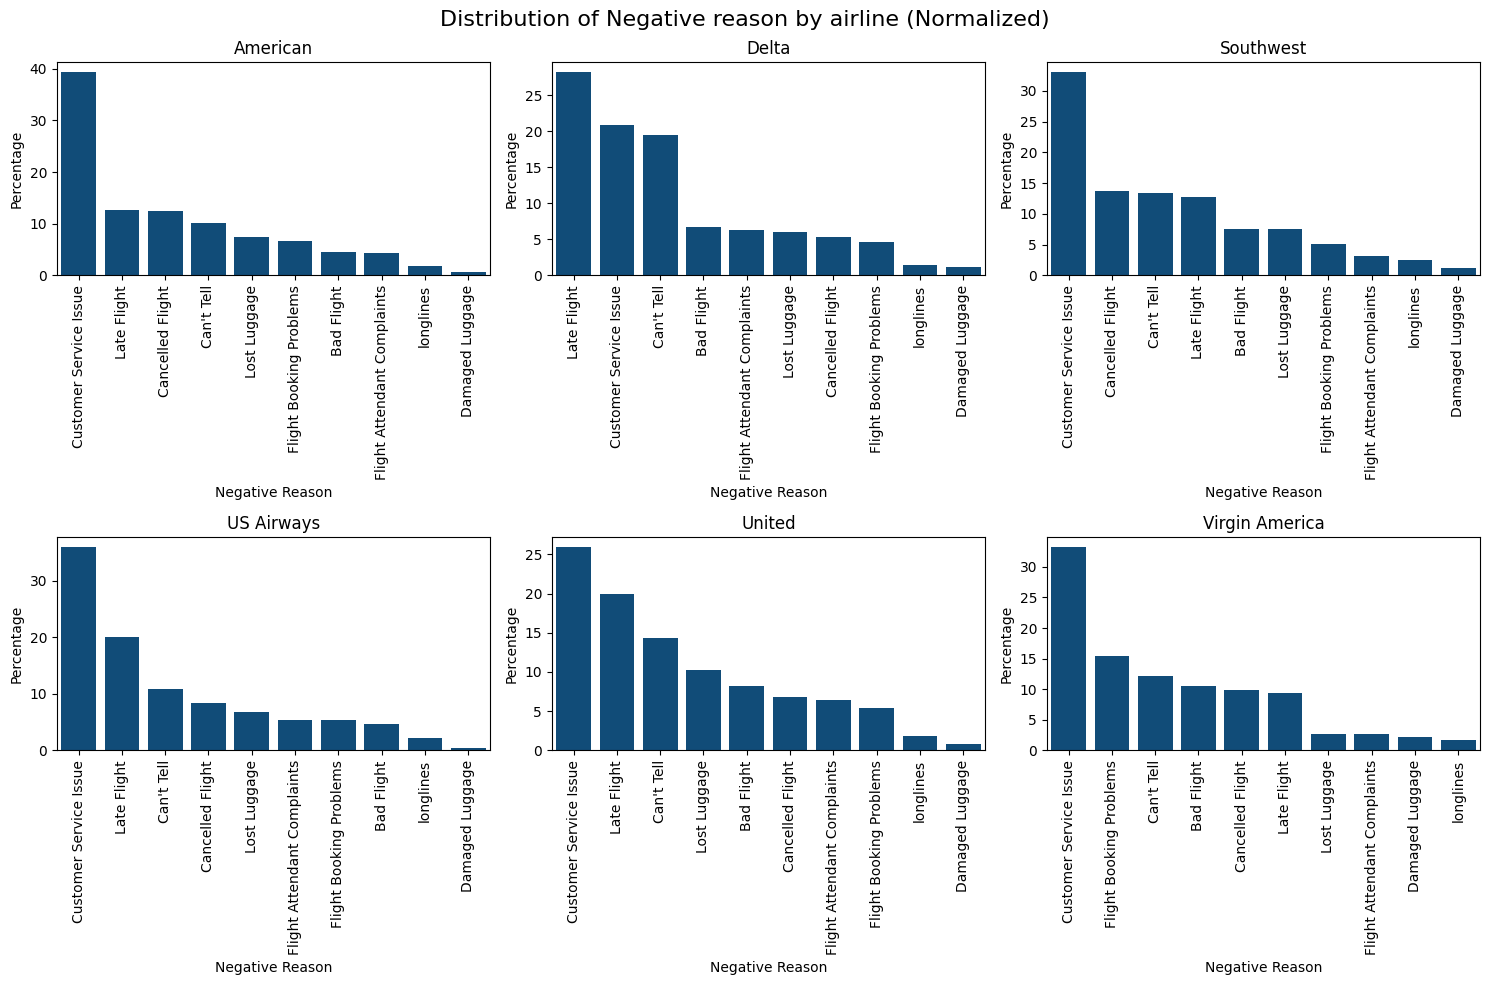

In [ ]:
# Calculate the counts of negative reasons by airline
reason_counts = df.groupby("airline")["negativereason"].value_counts()

# Convert the result to a DataFrame for easier manipulation
reason_counts_df = reason_counts.unstack(fill_value=0)  # fill_value=0 handles missing values

# Calculate the percentage for each reason within each airline
reason_percentages = reason_counts_df.div(reason_counts_df.sum(axis=1), axis=0) * 100


# Create a figure with 6 subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjust figsize as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through each airline and create a subplot
for i, airline in enumerate(reason_percentages.index):
    # Get the data for the current airline
    airline_data = reason_percentages.loc[airline].sort_values(ascending=False)

    # Create a bar plot on the current subplot
    sns.barplot(x=airline_data.index, y=airline_data.values, ax=axes[i], color="#004E89")
    axes[i].set_title(airline)
    axes[i].set_xlabel("Negative Reason")
    axes[i].set_ylabel("Percentage")
    axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

plt.suptitle("Distribution of Negative reason by airline (Normalized)", fontsize=16)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the figure
plt.show()

<details>
<summary><strong> Distribuição de queixas por Airline (normalizado) </strong> (Insights)</summary>

O gráfico acima mostra a distribuição das razões que levaram os clientes a fazer tweets com sentimentos negativos, por companhia aérea e em percentagem.

Observa-se que o problema reportado com maior frequência para todas as companhias aéreas, à exceção da **Delta**, é o mesmo - **customer service**.
O segundo problema mais comum varia entre companhias mas está, geralmente, diretamente relacionado com os voos: **cancelamentos** ou **atrasos**.

Relativamente à companhia em estudo, destaca-se o seguinte:

*   A US Airways tem uma percentagem muito alta de tweets relacionados com o customer service quando, comparada com  os seus concorrentes (exceto a American), sendo a companhia com o segundo valor mais elevado. A incidência deste problema parece significativamente maior que os outros reportados para a companhia.

Considerando estes valores, a US Airways parece estar a enfrentar alguns problemas de popularidade face aos seus concorrentes. Seria benéfico implementar medidas para mitigar os problemas reportados.



### Análise pelos utilizadores distintos

In [ ]:
# Agrupar os dados por airline
df_tweets_users = df.groupby("airline")["name"]

# Número total de tweets por airline
total_tweets = df_tweets_users.count()

# Número total de usuários distintos para cada airline
distinct_users = df_tweets_users.nunique()

# Número máximo de tweets de um único usuário para cada airline
max_tweets_by_user = df.groupby("airline")["name"].value_counts().groupby(level=0).max()

# Criar um DataFrame com todos os resultados
df_tweets_summary = pd.DataFrame({
    "total_tweets": total_tweets,
    "distinct_users": distinct_users,
    "max_tweets_by_user": max_tweets_by_user
})

# Calcular e adicionar colunas de porcentagem
df_tweets_summary["distinct_users_percentage"] = (df_tweets_summary["distinct_users"] / df_tweets_summary["total_tweets"]) * 100
df_tweets_summary["max_tweets_by_user_percentage"] = (df_tweets_summary["max_tweets_by_user"] / df_tweets_summary["total_tweets"]) * 100

# Exibir o resultado
df_tweets_summary

,total_tweets,distinct_users,max_tweets_by_user,distinct_users_percentage,max_tweets_by_user_percentage
airline,,,,,
American,2723,1305,28,47.925083,1.028278
Delta,2222,1136,62,51.125113,2.790279
Southwest,2420,1622,21,67.024793,0.867769
US Airways,2913,1473,23,50.566426,0.789564
United,3822,1989,27,52.040816,0.706436
Virgin America,504,394,9,78.174603,1.785714


<details>
<summary><strong> Análise de tweets feitos por utilizadores distintos </strong> (Insights)</summary>

A tabela apresenta dados sobre o volume de tweets feitos por utilizadores distintos. O objetivo desta análise é perceber se os tweets sobre as companhias se concentram em grupos reduzidos de clientes (poucos utilizadores distintos) ou se estamos perante opiniões amplamente partilhadas (muitos utilizadores distintos).

Observa-se o seguinte:


*   Virgin America e Southwest são as companhias com mais utilizadores distintos a fazer publicações no twitter (cerca de 78.17% e 67.02% de utilizadores distintos, respetivamente), o que indica que as opiniões são partilhadas por uma base ampla de clientes.

*   Como referido anteriormente, a US Airways é a segunda companhia mais mencionada em tweets, em percentagem (gráfico Popularidade por Airline (Percentagem de Tweets)). Contudo, é a segunda companhia com menor percentagem de utilizadores distintos a tweetar.

Cerca de metade dos tweets que mencionam a US Airways foram feitos por utilizadores distintos, o que sugere que uma proporção maior de tweets foi publicado por um grupo mais pequeno de utilizadores, contrariamente ao que acontece para as companhias **Virgin America** e **Southwest**.

No entanto, dados os valores baixos`max_tweets_by_user_percentage` para todas as companhias aéreas, as evidências sugerem que nenhum utilizador influenciou particularmente o volume de tweets.
Isto indica que a opinião sobre a US Airways é partilhada por vários utilizadores, mesmo que a percentagem de utilizadores distintos seja mais baixa, como é o caso para esta companhia.



<Figure size 1000x600 with 0 Axes>

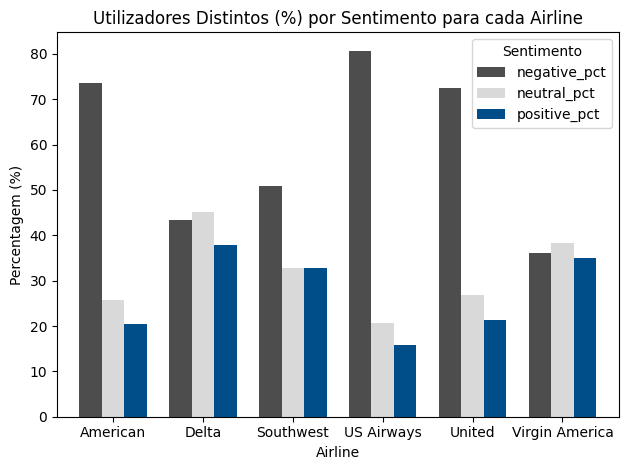

In [ ]:
# Selecionar apenas as colunas de percentagens de sentimento
sentiment_cols = ['negative_pct', 'neutral_pct', 'positive_pct']
df_plot = df_tweets_summary[sentiment_cols]

# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Criar um gráfico de barras agrupadas, com cores definidas para cada sentimento
ax = df_plot.plot(kind='bar', width=0.75, color=["#4d4d4d", "#d9d9d9", brand_color])

# Adicionar título e rótulos aos eixos
plt.title("Utilizadores Distintos (%) por Sentimento para cada Airline")
plt.xlabel("Airline")
plt.ylabel("Percentagem (%)")

# Adicionar legenda com título
plt.legend(title="Sentimento")
plt.xticks(rotation=0)

# Exibir o gráfico
plt.tight_layout()
plt.show()

<details>
<summary><strong> Utilizadores Distintos (%) por Sentimento para cada Airline  </strong> (Insights)</summary>

>O gráfico mostra a percentagem de utilizadores distintos que tweetaram sobre cada um dos sentimentos, por companhia aérea.

A análise do gráfico sugere que:

*   **US Airways** é a companhia com a maior percentagem de tweets feitos por utilizadores distintos com sentimentos negativos (cerca de 80%). É também a companhia com a percentagem mais baixa de  tweets com sentimentos positivos e neutros. Seguem-se a **American** e a **United**

*   **Delta**, **Southwest** e **Virgin American** apresentam nao só valores mais moderados como também um maior equilíbrio entre sentimentos.

Esta análise reforça, novamente, a ideia que existe uma polarização considerável para sentimentos negativos quando se trata da **US Airways**. O facto de ser a companhia com mais utilizadores distintos a partilhar negativos sugere que os problemas reportados são comuns a vários utilizadores e não a um grupo restrito de clientes que são mais ativos nas redes sociais.

A companhia enfrenta, claramente, um desafio no que toca a imagem e popularidade face aos seus concorrentes. Torna-se importante investigar para identificar problemas e encontrar soluções para melhorar a imagem junto dos clientes.


</details>

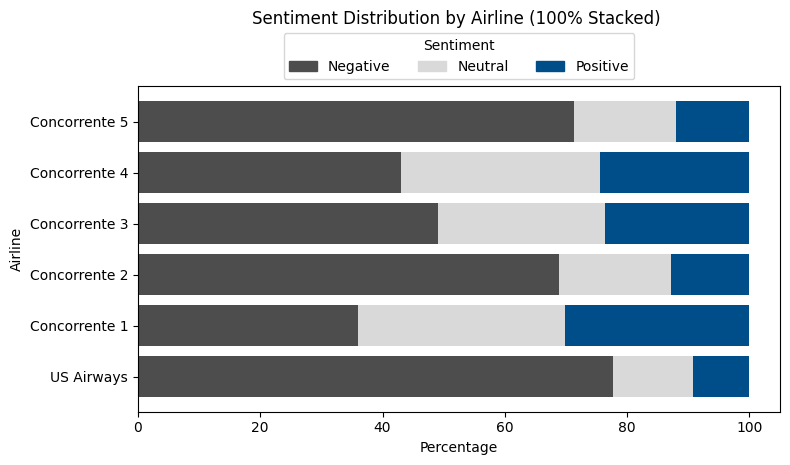

In [ ]:
# Análise dos sentimentos

# Definir a cor da US Airways e as cores para os sentimentos
brand_color = "#004E89"  # Azul para o sentimento positivo
colors = {
    "negative": "#4d4d4d",  # Cinzento escuro
    "neutral": "#d9d9d9",   # Cinzento claro
    "positive": brand_color
}

# 1. Criar uma tabela com os percentuais (normalizados para 100%) de sentimentos por airline
sentiment_df = (df.groupby("airline")["airline_sentiment"]
                  .value_counts(normalize=True)
                  .mul(100)
                  .unstack()
                  .fillna(0))
# Garantir a ordem: negative, neutral, positive
sentiment_df = sentiment_df[["negative", "neutral", "positive"]]

# 2. Renomear as companhias: manter US Airways; os restantes viram "Concorrente i"
mapping = {"US Airways": "US Airways"}
competitors = [airline for airline in df["airline"].unique() if airline != "US Airways"]
for i, airline in enumerate(competitors):
    mapping[airline] = f"Concorrente {i+1}"

sentiment_df.rename(index=mapping, inplace=True)

# 3. Reordenar as linhas para que a US Airways apareça primeiro
ordered_airlines = ["US Airways"] + [mapping[a] for a in competitors]
sentiment_df = sentiment_df.loc[ordered_airlines]

# 4. Plotar o gráfico de barras horizontais empilhadas (100%)
fig, ax = plt.subplots(figsize=(8, 5))
for airline in sentiment_df.index:
    left = 0
    for sentiment in ["negative", "neutral", "positive"]:
        value = sentiment_df.loc[airline, sentiment]
        ax.barh(airline, value, left=left, color=colors[sentiment])
        left += value

ax.set_xlabel("Percentage")
ax.set_ylabel("Airline")
ax.set_title("Sentiment Distribution by Airline (100% Stacked) \n", pad=30)

# 5. Criar legenda customizada (em uma linha, entre título e gráfico)
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors[s]) for s in ["negative", "neutral", "positive"]]
legend_labels = ["Negative", "Neutral", "Positive"]
ax.legend(legend_handles, legend_labels, title="Sentiment", loc='upper center',
          bbox_to_anchor=(0.5, 1.185), ncol=3)

# Ajustar o layout para reservar espaço no topo
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<details>
<summary><strong> Distribuição de sentimentos por airline (100% Stacked) </strong> (Insights)</summary>

Podemos, ainda, olhar para uma abordagem alternativa ao gráfico anterior. No próximo gráfico, **`"Airline Distribution by Sentiment (Sorted)"`**, mostramos as percentagens de cada empresa, ordenando dos maiores valores para os menores, no eixo y. É possível observar que a US Airways é:
* a **empresa** com **maior** percentagem de **tweets negativos**
* a **empresa** com **menor** percentagem de **tweets neutros**
* a **empresa** com **menor** percentagem de **tweets positivos**

Novamente, os dados reforçam a perceção negativa da US Airways face aos seus concorrentes.

</details>

### Análise de retweet

In [ ]:
# prompt: df.describe() isola o tweet com o max retweet_count

# Find the index of the tweet with the maximum retweet_count
max_retweet_index = df['retweet_count'].idxmax()

# Get the tweet with the maximum retweet_count
max_retweet_tweet = df.loc[max_retweet_index]

max_retweet_tweet

,11596
tweet_id,567898000000000000.0
airline_sentiment,negative
airline_sentiment_confidence,1.0
negativereason,Late Flight
negativereason_confidence,1.0
airline,US Airways
airline_sentiment_gold,NaN
name,OBJ_3
negativereason_gold,NaN
retweet_count,44


<details>
<summary><strong> Análise do tweet com maior número de partilhas no dataset </strong> (Insights)</summary>

A popularidade das companhias aéreas pode ser analisada não só pelo número de tweets a seu respeito mas também pelas interações com os mesmos (número de partilhas, likes ou respostas).

De acordo com a tabela de estatísticas descritivas, observa-se que o número máximo de partilhas para um tweet foi 44.

Na tabela abaixo, encontram-se os detalhes sobre o tweet mais partilhado.
Trata-se de um tweet com **sentimento negativo** cujo motivo foi **atraso no voo**.
Contudo, numa amostra com mais de 14000 observações, este valor é pouco significativo. Fizemos referência ao mesmo pois é sobre a companhia aérea em estudo mas não vamos aprofundar esta análise dado o seu baixo impacto.

In [ ]:
top_5_tweets_total = us_airways_tweets.sort_values(by='retweet_count', ascending=False).head(5)

# Display the top 3 tweets
top_5_tweets_total

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
11596,5.678980e+17,negative,1.0000,Late Flight,1.0000,US Airways,NaN,OBJ_3,NaN,44,@USAirways 5 hr flight delay and a delay when ...,NaN,2/17/2015 20:06,NaN,Eastern Time (US & Canada)
11582,5.679090e+17,negative,1.0000,Can't Tell,0.6608,US Airways,NaN,OBJ_3,NaN,32,@USAirways of course never again tho . Thanks ...,NaN,2/17/2015 20:50,NaN,Eastern Time (US & Canada)
9999,5.695840e+17,neutral,0.6593,NaN,NaN,US Airways,NaN,airliners2,NaN,28,@USAirways with this livery back in the day. h...,NaN,2/22/2015 11:46,Airports Around The World,Eastern Time (US & Canada)
9453,5.699300e+17,positive,1.0000,NaN,NaN,US Airways,NaN,Blasterjaxx,NaN,9,@USAirways Wow unbelievable how you treat your...,NaN,2/23/2015 10:42,TotalWorldJaxxination,NaN
11591,5.679050e+17,negative,0.6625,Late Flight,0.6625,US Airways,NaN,OBJ_3,NaN,4,@USAirways No need for apologies just an unfor...,NaN,2/17/2015 20:35,NaN,Eastern Time (US & Canada)


In [ ]:
# Filter for US Airways tweets
us_airways_tweets = df[df['airline'] == 'US Airways']

# Sort by retweet count in descending order and get the top 3
top_5_tweets = us_airways_tweets.sort_values(by='retweet_count', ascending=False).head(5)

# Display the top 3 tweets
top_5_tweets

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
11596,5.678980e+17,negative,1.0000,Late Flight,1.0000,US Airways,NaN,OBJ_3,NaN,44,@USAirways 5 hr flight delay and a delay when ...,NaN,2/17/2015 20:06,NaN,Eastern Time (US & Canada)
11582,5.679090e+17,negative,1.0000,Can't Tell,0.6608,US Airways,NaN,OBJ_3,NaN,32,@USAirways of course never again tho . Thanks ...,NaN,2/17/2015 20:50,NaN,Eastern Time (US & Canada)
9999,5.695840e+17,neutral,0.6593,NaN,NaN,US Airways,NaN,airliners2,NaN,28,@USAirways with this livery back in the day. h...,NaN,2/22/2015 11:46,Airports Around The World,Eastern Time (US & Canada)
9453,5.699300e+17,positive,1.0000,NaN,NaN,US Airways,NaN,Blasterjaxx,NaN,9,@USAirways Wow unbelievable how you treat your...,NaN,2/23/2015 10:42,TotalWorldJaxxination,NaN
11591,5.679050e+17,negative,0.6625,Late Flight,0.6625,US Airways,NaN,OBJ_3,NaN,4,@USAirways No need for apologies just an unfor...,NaN,2/17/2015 20:35,NaN,Eastern Time (US & Canada)


<details>
<summary><strong> Análise de tweets com mais retweets - US Airways e top 5 geral  </strong> (Expandir)</summary>

> Para analisar uma das dimensões que pode impactar a popularidade da US Airways, nomeadamente os tweets com mais partilhas da base de dados, geramos o top 5 de tweets com mais partilhas para todas as companhias aéreas e apenas para a companhia US Airways. Observa-se que os tweets são exatamente os mesmos.
Assim, podemos inferir que:

*   Dos 5 tweets, 3 têm sentimentos negativos (2 tweets cujo motivo foi voo atrasado e o terceiro com o motivo "Can't tell", que indica incerteza face ao motivo do tweet). Um dos restantes tweets tem sentimento positivo e o outro tem sentimento neutro.


*   Três dos tweets (todos os que têm sentimento negativo) foram feitos no espaço de uma hora e dois deles têm a mesma `negative_reason`, para além de se encontrarem no top 5 de tweets mais partilhados do dataset. Não existe, contudo, evidência direta nos dados que aponte para alguma relação entre estes tweets.

*   O número de partilhas varia significativamente entre os tweets (entre 2 e 44), o que indica que nem todos os tweets tiveram o mesmo nível de concordância entre utilizadores. Contudo, o facto dos tweets mais partilhados terem sentimentos negativos associados sugere que a US Airways enfrenta um grande desafio em termos de imagem junto dos seus clientes.



</details>

### Resposta ao email (Parte 1): Popularidade


<details>
<summary><strong> 📤 Resposta ao email (Parte 1): Popularidade </strong> (Explicação)</summary>

Relativamente à questão colocada sobre a popularidade da US Airways, apresentamos a análise com base em dados como o volume de tweets (por companhia aérea e por sentimento), os principais problemas levantados pelos clientes e o engagement associado às publicações.

A análise permite concluir que a **US Airways** tem elevada visibilidade no twitter, sendo a segunda companhia mais mencionada (cerca de 20% do total dos tweets), apenas ultrapassada pela **United**.
Embora, à partida, este volume possa ser interpretado como sinal de popularidade face aos seus concorrentes, uma breve análise mostra que esta visibilidade é maioritariamente negativa.

Principais conclusões:

*   **80%** dos tweets sobre a **US Airways** apresentam sentimentos negativos,a percentagem mais elevada de tweets com este sentimento.

*   Em contrapartida, **Virgin America**, **Delta** e **Southwest** apresentam distribuições de sentimentos mais equilibradas, o que revela uma perceção menos negativa dos seus clientes.

*   O problema mais reportado nos tweets negativos é, em geral, o customer service. Este problema é particularmente significativo na **US Airways**, sendo a segunda companhia com maior incidência desta queixa.

*   Relativamente aos utilizadores, cerca de 50% dos tweets negativos foram feitos por utilizadores distintos. Isto reforça que a perceção negativa é partilhada por uma base alargada de clientes, não estando concentrada num grupo reduzido.

*   O período de análise é de apenas 9 dias, o que pode ser uma limitação para a generalização de resultados. Eventos decorridos durante esse intervalo podem ter influenciado os dados.


Embora a US Airways possa ser considerada popular no Twitter se olharmos exclusivamente para o volume de tweets, a sua imagem é notoriamente negativa quando são analisados diferentes indicadores e em comparação com os concorrentes.

De notar que esta opinião parece ser amplamente partilhada por utilizadores distintos, especialmente em relação ao customer service.

Recomenda-se que sejam tomadas medidas para melhorar a perceção da marca que poderão passar pela resposta ativa às críticas, melhoria do atendimento ao cliente ou medidas para gestão de crise.

## Pergunta 2: Can you identify what issues we should focus on to try to improve customer satisfaction?

Para melhorar a satisfação dos clientes, é essencial entender as principais causas de insatisfação. Desta forma, analisamos os motivos de queixas de maneira geral e através de visualizações de wordcloud. Para além disso optamos por uma análise mais detalha aos tweets sobre o Customer Service e "Can't Tell", por serem as queixas mais mencionadas pelos utilizadores.  

De maneira a efetuar uma comparação mais equitativa entre os motivos de reclamações das diferentes companhias, a melhor abordagem é utilizar percentagens.
Em vez de considerar apenas os volumes absolutos das reclamações, que podem variar bastante consoante a dimensão da empresa no conjunto de dados, é mais adequado recorrer ao uso de percentagens para identificar padrões de insatisfação, independentemente do número total de tweets.


### Contextualização das Queixas

In [ ]:
# Filtrar apenas avaliações negativas
df_neg = df[df["airline_sentiment"] == "negative"]

# Contar os motivos por companhia
motivos_por_empresa = df_neg.groupby("airline")["negativereason"].value_counts().unstack().fillna(0)

# Calcular as percentagens
motivos_percent = motivos_por_empresa.div(motivos_por_empresa.sum(axis=1), axis=0) * 100

# Mostrar apenas as percentagens
display(motivos_percent)

negativereason,Bad Flight,Can't Tell,Cancelled Flight,Customer Service Issue,Damaged Luggage,Flight Attendant Complaints,Flight Booking Problems,Late Flight,Lost Luggage,longlines
airline,,,,,,,,,,
American,4.482226,10.200927,12.467800,39.258114,0.618238,4.430706,6.697579,12.570840,7.521896,1.751674
Delta,6.701571,19.476440,5.340314,20.837696,1.151832,6.282723,4.607330,28.167539,5.968586,1.465969
Southwest,7.588533,13.406408,13.659359,32.967960,1.180438,3.204047,5.143339,12.816189,7.588533,2.445194
US Airways,4.595669,10.870526,8.351745,35.837384,0.486080,5.435263,5.391074,20.017676,6.805126,2.209456
United,8.203570,14.394227,6.874288,25.864033,0.835549,6.380555,5.469047,19.939233,10.216483,1.823016
Virgin America,10.497238,12.154696,9.944751,33.149171,2.209945,2.762431,15.469613,9.392265,2.762431,1.657459


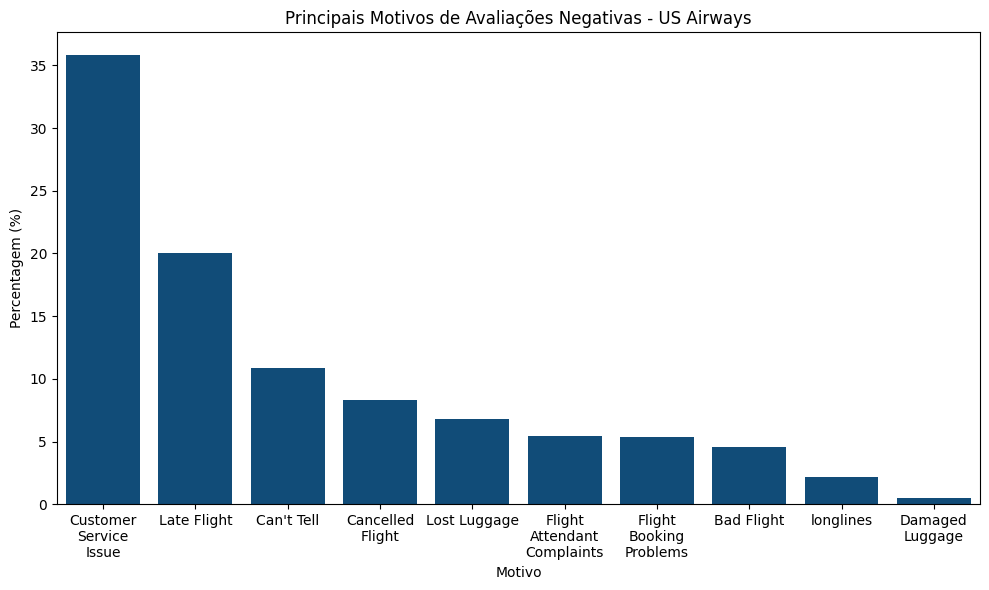

In [ ]:
import textwrap

# dados us airways
us_airways_data = motivos_percent.loc["US Airways"].dropna()
us_airways_data = us_airways_data.sort_values(ascending=False)

# criar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=us_airways_data.index, y=us_airways_data.values, color="#004E89")
plt.title("Principais Motivos de Avaliações Negativas - US Airways")
plt.xlabel("Motivo")
plt.ylabel("Percentagem (%)")

# ajustar os rótulos do eixo x
labels = [textwrap.fill(label.replace('_', ' '), 12) for label in us_airways_data.index]  # Quebrar em várias linhas

# definir as posições dos ticks e os rótulos
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=0, ha="center")  # Define os rótulos e ajusta a rotação e o alinhamento

plt.tight_layout()
plt.show()

<details>
<summary><strong> Principais Motivos de Avaliações Negativas - US Airways </strong> (Insights)</summary>

O gráfico representa os principais motivos das avaliações negativas dos clientes da US Airways, expressos em percentagem. A partir da análise dos dados, é possível identificar os fatores que mais contribuem para a insatisfação dos passageiros, permitindo uma compreensão mais aprofundada dos pontos críticos que necessitam de atenção.
Principais Problemas Identificados:
*   **Customer Service Issue (aproximadamente 35%):** maior problema identificado, sendo responsável por mais de um terço das reclamações. Evidencia as dificuldades na interação entre os passageiros e a equipa da companhia aérea

*   **Late Flight (aproximadamente 20%):** o segundo maior motivo de reclamação está relacionado à pontualidade dos voos. A pontualidade dos voos afeta significativamente a experiência dos passageiros.

*   **Can't Tell (aproximadamente 11%):** um número significativo de clientes não consegue especificar o problema, o que pode indicar uma experiência geral insatisfatória ou dificuldades em categorizar a reclamação.

*   **Cancelled Flight (aproximadamente 8%):** os voos serem cancelados é problema relevante na insatisfação dos clientes, uma vez que causa transtornos e alterações inesperadas nos planos dos passageiros.

*   **Lost Luggage (aproximadamente 6%):** a perda de bagagem também se destaca como uma reclamação frequente,  uma vez que afeta diretamente a sua viagem e pode causar situações de grande desconforto e stress.

*   Para além dos fatores principais, foram identificadas reclamações relacionadas com os assistentes de bordo, problemas na reserva, qualidade do voo, longas filas e bagagem danificada. Embora representem uma pequena percentagem das reclamações, são aspetos que podem impactar a perceção geral da empresa.

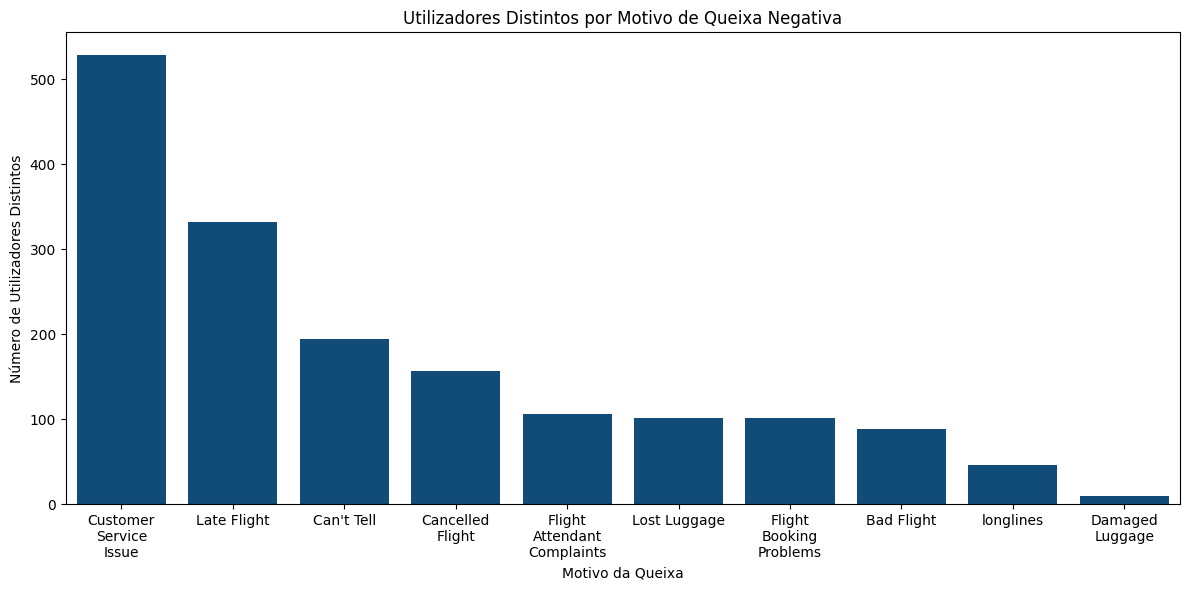

In [ ]:
df_neg_us = df[(df["airline_sentiment"] == "negative") & (df["airline"] == "US Airways")]

user_counts = df_neg_us.groupby("negativereason")["name"].nunique().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=user_counts.index, y=user_counts.values, color="#004E89")
plt.title("Utilizadores Distintos por Motivo de Queixa Negativa")
plt.xlabel("Motivo da Queixa")
plt.ylabel("Número de Utilizadores Distintos")

# ajuste das labels no eixo x (para facilitar a leitura)
labels = [textwrap.fill(label.replace('_', ' '), 12) for label in user_counts.index]
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=0, ha="center")

plt.tight_layout()
plt.show()

<details>
<summary><strong> Utilizadores Distintos por Motivo de Queixa Negativa </strong> (Insights)</summary>

O gráfico representa o número de utilizadores distintos que reportaram cada motivo de reclamação, ao invés de apresentar a distribuição percentual das queixas.

*   **Customer Service Issue, Late Fligh e Can't Tell:** O atendimento ao cliente continua a ser o principal problema, com mais de 500 utilizadores distintos a reclamarem. Em seguida, os atrasos nos voos afetam cerca de 350 utilizadores, enquanto aproximadamente 200 passageiros manifestaram insatisfação sem especificar a razão da insatisfação.

*   **Flight Attendant Complaints:** no gráfico anterior este problema aparecia com menor percentagem do que Lost Luggage, contudo o número de pessoas que reclamou dos assistentes de bordo é comparável a problemas com a perda de bagagem e problemas na reserva de voos.

*  **Long Lines e Damaged Luggage:** apresentam um número ainda menor de utilizadores distintos, reforçando que são questões menos frequentes.

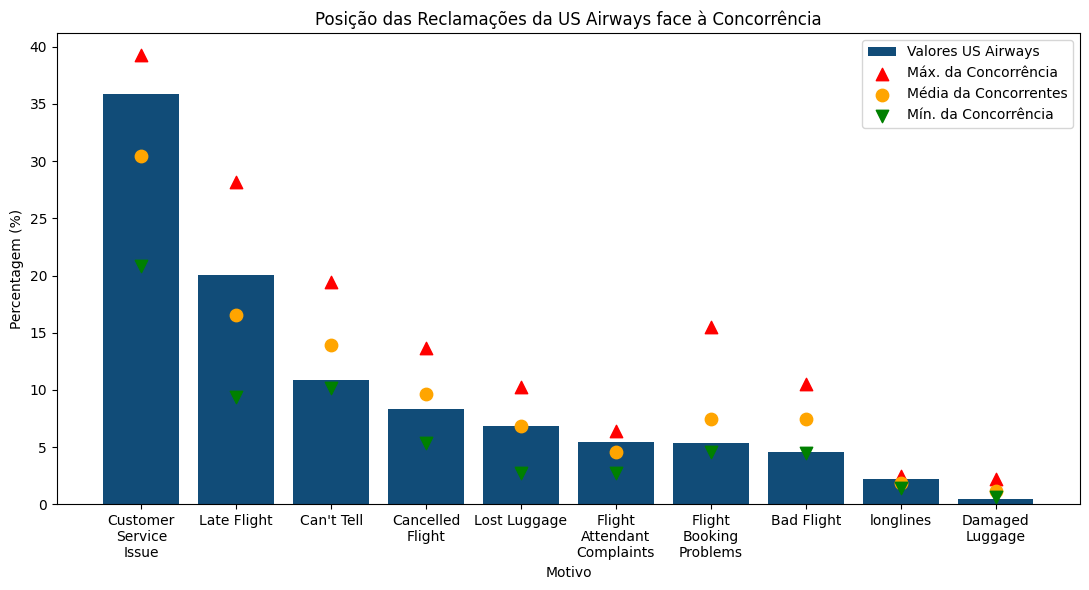

In [ ]:
# Curiosidade face à concorrência

# extrair os dados da US Airways
us_airways_data = motivos_percent.loc["US Airways"].dropna()

# calcular estatísticas dos concorrentes (excluindo US Airways)
concorrentes = motivos_percent.drop(index="US Airways", errors='ignore')
media_concorrentes = concorrentes.mean()
min_concorrentes = concorrentes.min()
max_concorrentes = concorrentes.max()

# ordenar os dados da US Airways de forma decrescente
us_airways_data = us_airways_data.sort_values(ascending=False)

# criar o gráfico de barras
plt.figure(figsize=(11, 6))
ax = sns.barplot(x=us_airways_data.index, y=us_airways_data.values, color="#004E89", label="US Airways")

# adicionar estatísticas dos concorrentes com os marcadores de dispersão
scatter_max = plt.scatter(us_airways_data.index, max_concorrentes[us_airways_data.index], color='red', marker='^', s=80)
scatter_media = plt.scatter(us_airways_data.index, media_concorrentes[us_airways_data.index], color='orange', marker='o', s=80)
scatter_min = plt.scatter(us_airways_data.index, min_concorrentes[us_airways_data.index], color='green', marker='v', s=80)

# ajustar os rótulos do eixo x
labels = [textwrap.fill(label.replace('_', ' '), 12) for label in us_airways_data.index]
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=0, ha="center")

# títulos e legendas
plt.title("Posição das Reclamações da US Airways face à Concorrência")
plt.xlabel("Motivo")
plt.ylabel("Percentagem (%)")

# alterar a ordem da legenda
plt.legend([ax.patches[0], scatter_max, scatter_media, scatter_min],
           ["Valores US Airways", "Máx. da Concorrência", "Média da Concorrentes", "Mín. da Concorrência"],
           loc="upper right")

plt.tight_layout()
plt.show()

<details>
<summary><strong> Posição das Reclamações da US Airways face à Concorrência </strong> (Insights)</summary>

O gráfico compara a percentagem das reclamações da US Airways com a concorrência em diferentes motivos. A partir do gráfico é possível concluir:

*   **Pior que a Concorrência:** Customer Service Issue e Late Flight são a maiores fontes de reclamações para a US Airways, ambas encontram-se significativamente acima da média dos concorrentes. Para além disso Flight Attendant Complaints a percentagem de reclamações encontra-se um bocadinho acima da média.

*   **Melhor que a Concorrência:** Can't Tell, Cancelled Flight, Bad Flight e Damaged Luggage encontram-se abaixo da média da concorrência. No mesmo seguimento é importante referir que Flight Booking Problems a percentagem de reclamações é ligeiramente menor que a média, contudo é interessante perceber que o máximo da concorrência é bastante elevado em comparação a média, isto poderá dever-se alguns concorrentes enfrentarem desafios significativos nessa área.

*   **Lost Luggage e Longlines:** a percentagem das reclamações encontra-se muito próxima da média da concorrência.



### Wordcloud: Queixas Geral

Para compreender melhor a percepção pública em relação à US Airways, foi gerado uma wordcloud com  base em tweets publicados por usuários, de forma a revelar os aspectos que geram insatisfação.

Esta visualização vai permitir uma análise intuitiva  da reputação da empresa na rede social, ajudando a identificar as áreas que são necessárias melhorar.

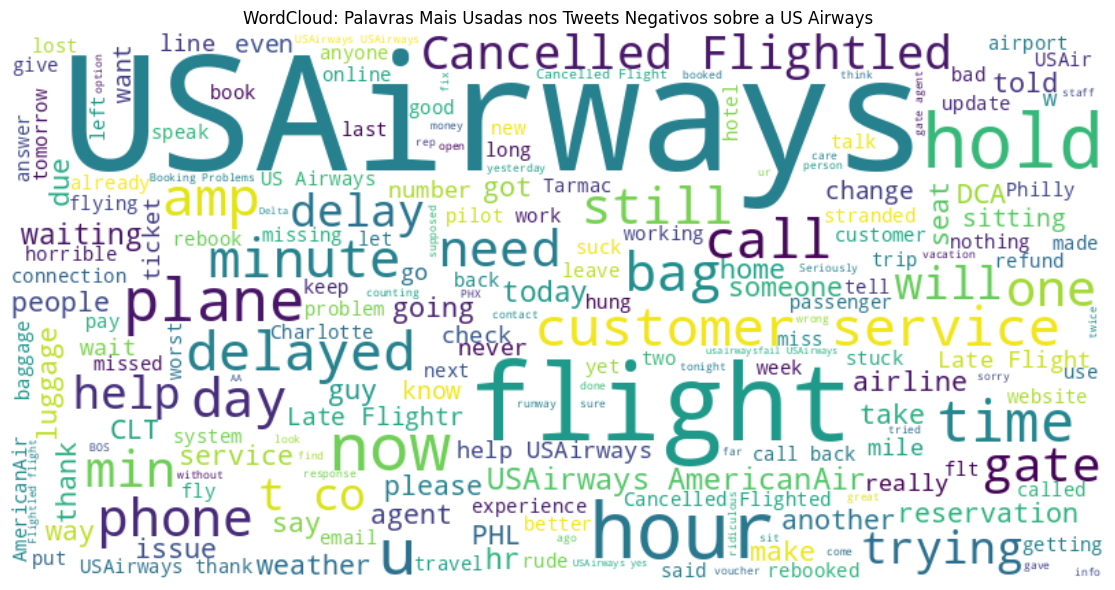

In [ ]:
# Wordcloud Tweets Negativos da US Airways

# filtrar os tweets da nossa companhia
neg_tweets_us = df_neg[df_neg["airline"] == "US Airways"]

# combinar todo o texto dos tweets negativos da companhia
text_company = " ".join(neg_tweets_us["text"].tolist())

# definir stopwords (palavras comuns que serão ignoradas)
stopwords = set(STOPWORDS)

# criar wordcloud
wordcloud_company = WordCloud(width=800,
                              height=400,
                              background_color="white",
                              stopwords=stopwords,
                              collocations=True).generate(text_company)

# plot wordcloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_company, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud: Palavras Mais Usadas nos Tweets Negativos sobre a US Airways")
plt.tight_layout()
plt.show()

<details>
<summary><strong> Palavras Mais Usadas nos Tweets Negativos sobre US Airways </strong> (Insights)</summary>

As palavras mais recorrentes em tweets negativos sobre a US Airways, a partir da análise do tamanho e a frequência das palavras são as seguintes:

*   "customer", "service", "agent", "hold", "phone", "call" – Problemas com o atendimento ao cliente são um tema forte.

*   "delayed", "cancelled", "late" – Evidencia problemas com voos atrasados ou cancelados.

*   "hour", "time", "minute", "day" – Expressões de frustração com tempo perdido.

*   "bag", "luggage", "lost", "baggage" – Problemas com as bagagens.

*   "gate", "seat", "boarding" – Dificuldades operacionais no embarque.

Desta forma, para uma primeira anáise conseguimos perceber que os **temas centrais identificados** são:


*   Atrasos e cancelamentos de voos

*   Tempo de espera e dificuldade de contacto com a companhia

*   Problemas com bagagens

*   Mau atendimento ao cliente

*   Frustração geral expressa em termos como “need”, “help”, “still”, “trying”

### Análise Individual dos Motivos Customer Service e Can't Tell

A presente análise visa aprofundar a compreensão de dois motivos de reclamação distintos, porém relevantes, identificados no gráfico inicial: "Customer Service" e "Can't Tell".
Ao analisar estes dois motivos – um pela sua abrangência e magnitude, e o outro pela sua incerteza – procuramos obter uma visão mais completa dos desafios enfrentados pela empresa na perspetiva dos seus clientes, com o objetivo de direcionar futuras investigações e ações de melhoria de forma mais eficaz.

#### Maior problema: Customer Service

<details>
<summary><strong> Customer Service
 </strong> (Expandir)</summary>

 Com base na análise detalhada dos gráficos anteriores, torna-se evidente que o Customer Service é o maior desafio que a empresa enfrenta atualmente. A sua elevada incidência nas reclamações, superando significativamente as demais categorias e a média da concorrência, demonstra a urgência em concentrar esforços para a sua resolução.

 Face à complexidade e à vasta gama de problemas subjacentes à categoria "Customer Service", torna-se imperativo adotar uma análise focada em perceber os pontos críticos de insatisfação. Dada a sua natureza genérica e a elevada frequência, torna-se crucial investigar as causas subjacentes a estas queixas para identificar áreas específicas de melhoria.


 Desta forma optamos pela criação de uma word cloud a partir dos tweets com sentimento negativo direcionados à US Airways e que explicitamente mencionam o "Customer Service" como motivo da crítica.

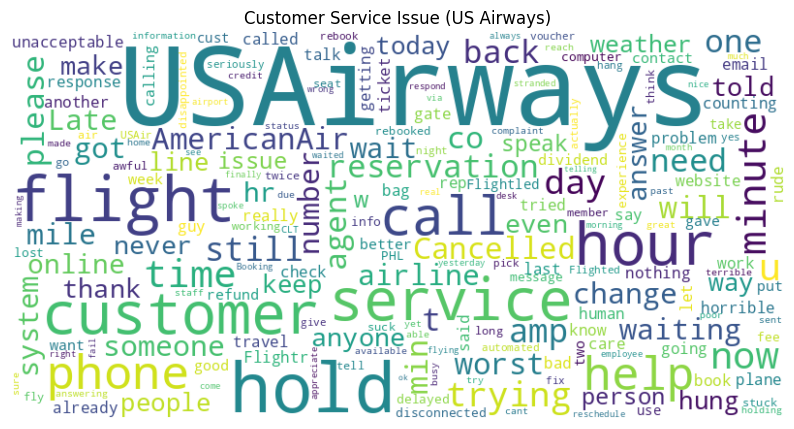

In [ ]:
# customer service -> especificar problemas

# filtrar tweets -> airline "US Airways" -> airline_sentiment "negative" -> negative_reason -> "Customer Service Issue"

us_cs_tweets = df[(df["airline"] == "US Airways") &
                  (df["airline_sentiment"] == "negative") &
                  (df["negativereason"] == "Customer Service Issue")]["text"]

# Join all tweet texts into one large string
text_us_cs = " ".join(us_cs_tweets.astype(str).tolist())

# criar wordcloud
wordcloud_us_cs = WordCloud(width=800, height=400,
                            background_color='white',
                            stopwords=STOPWORDS,
                            collocations=False).generate(text_us_cs)

# plot wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_us_cs, interpolation="bilinear")
plt.axis("off")
plt.title("Customer Service Issue (US Airways)")
plt.show()

<details>
<summary><strong> Análise Customer Service da US Airways </strong> (Insights)</summary>

As palavras mais informativas que apontam diretamente para as áreas problemáticas do "Customer Service" da US Airways são:

*   **Hold/Wait/Waiting/Hour/Minute:** evidenciam longos tempos de espera como um problema crucial, ou seja, reforça a ideia de demoras e ineficiência no atendimento.

*   **Call/Called/Calling:** sugere dificuldades com o atendimento telefónico, isto pode também incluir longos tempos de espera, dificuldade em contactar ou problemas durante a própria chamada.

*   **Agent:** podem apontar para questões relacionadas à qualidade, disponibilidade ou capacidade dos representantes da companhia aérea.

*   **Website/Online:** indicam problemas com os canais digitais de atendimento  (site, possivelmente aplicações), a menção destas palavras indica que também contribuiram para a insatisfação.

*   **Reservation/Change:** sugerem que problemas com a gestão de reservas e alterações requerem interação com o atendimento ao cliente e são fontes de insatisfação.

*   As palavras de sentimento negativo ("Horrible", "Terrible", "Worst", "Suck", "Disappointed", "Unacceptable") reforçam a intensidade da insatisfação e  frustração dos clientes com o atendimento recebido.

#### Extra: Customer Service - American Airlines

<details>
<summary><strong> Customer Service - American Airlines </strong> (Expandir)</summary>

Considerando que a análise da word cloud do "Customer Service" da US Airways revelou insights valiosos sobre os nossos principais pontos de fragilidade neste motivo, seria interessante replicar a mesma metodologia para a companhia aérea que apresenta a maior percentagem de queixas nesta categoria – a American Airlines.

Ao elaborarmos uma word cloud a partir dos tweets com sentimento negativo e motivo "Customer Service" referentes à American Airlines, obteremos uma comparação crucial, que nos permite identificar se os temas de insatisfação são semelhantes, o que reforça importância de focarmos nos nas áreas já identificadas na nossa própria análise. Por outro lado, se surgirem problemas distintos nesta análise, poderemos  considerar se alguns desses aspetos também merecem a nossa atenção e se existem oportunidades de melhoria em áreas que não foram tão evidentes na nossa análise inicial.

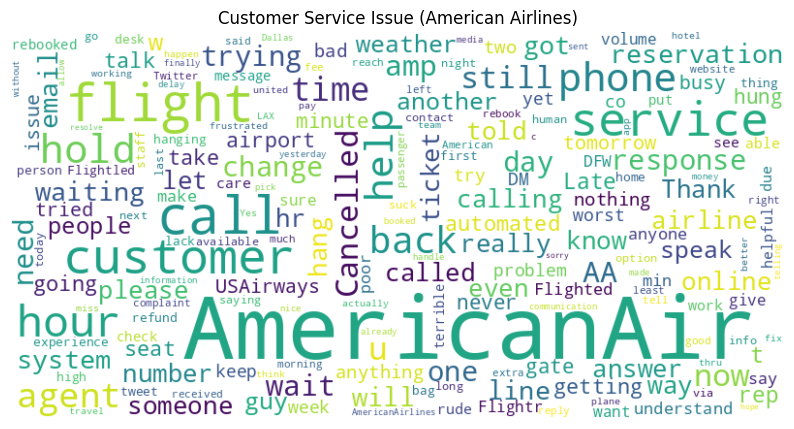

In [ ]:
# comparar com a empresa com pior percentagem de customer service (american)

# Filter for American Airlines tweets with negative sentiment and 'Customer Service Issue'
american_cs_tweets = df[(df["airline"] == "American") &
                        (df["airline_sentiment"] == "negative") &
                        (df["negativereason"] == "Customer Service Issue")]["text"]

# Join texts for American Airlines tweets
text_american_cs = " ".join(american_cs_tweets.astype(str).tolist())

# Create the wordcloud object for American Airlines
wordcloud_american_cs = WordCloud(width=800, height=400,
                                  background_color='white',
                                  stopwords=STOPWORDS,
                                  collocations=False).generate(text_american_cs)

# plot wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_american_cs, interpolation="bilinear")
plt.axis("off")
plt.title("Customer Service Issue (American Airlines)")
plt.show()

<details>
<summary><strong> Análise Customer Service da American Airlines </strong> (Insights)</summary>

A análise word cloud da American Airlines revela problemas comuns e significativos, centrados em longos tempos de espera, dificuldades no atendimento telefónico e online, desafios nas interações com representantes da empresa e na gestão de reservas.

Para além disso American Airlines apresenta mais palavras informativas que apontam diretamente para as áreas problemáticas do "Customer Service":
*  **Back/ Response:** indica falta de acompanhamento ou resolução de problemas por parte da American Airlines.

*   **System:** pode indicar problemas no sistema American Airlines.

*   **Email:** sugere que este canal de comunicação pode ser particularmente problemático para os clientes da American Airlines.

*  **Know, Understand:** falta de compreensão dos agentes para compreender e lidar com os problemas dos clientes.

*  **Told:** sugere informações incorretas ou expectativas não atendidas comunicadas pelos agentes aos clientes




#### Terceiro maior problema: Can't tell

<details>
<summary><strong> Can't tell </strong> (Expandir)</summary>

A análise da categoria "Can't Tell" revelou-se particularmente intrigante, para compreender como surge a dificuldade por parte dos clientes em categorizar o motivo da sua reclamação. Para compreender esta dificuldade, pretendemos identificar potenciais ambiguidades no processo de reporte de reclamações ou examinar a clareza e abrangência das opções de categorias oferecidas aos utilizadores.

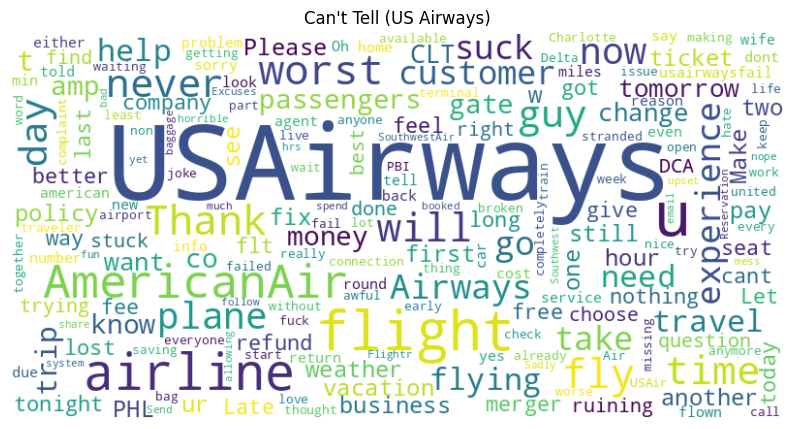

In [ ]:
# ver palavras mais usadas no can't tell

# filtrar -> US Airways -> sentimento "negative" -> razão 'Can't Tell'
cant_tell_tweets = df[(df["airline"] == "US Airways") &
                      (df["airline_sentiment"] == "negative") &
                      (df["negativereason"] == "Can't Tell")]["text"]

# join
text_cant_tell = " ".join(cant_tell_tweets.astype(str).tolist())

# criar wordcloud para 'Can't Tell'
wordcloud_cant_tell = WordCloud(width=800, height=400,
                                background_color='white',
                                stopwords=STOPWORDS,
                                collocations=False).generate(text_cant_tell)

# plot wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_cant_tell, interpolation="bilinear")
plt.axis("off")
plt.title("Can't Tell (US Airways)")
plt.show()

<details>
<summary><strong> Análise Can't Tell da US Airways </strong> (Insights)</summary>

A word cloud demonstra a presença de palavras como "worst", "suck", "lost", "ruining", "fail", e "hate" sugere que muitas das reclamações são altamente emocionais e carregadas de frustração, o que poderá indicar que o cliente está demasiado insatisfeito para conseguir especificar exatamente o motivo, uma vez que poderá sentir que tudo correu mal. Para além disso existe:

**Vários Problemas Simultâneos:** termos como "flight", "trip", "gate", "refund", "customer", "policy", "stuck" e "lost" apontam para queixas relacionadas tanto com a logística do voo quanto com o serviço ao cliente.

Desta forma a má experiencia do cliente pode não se limitar só a um motivo, e por isso o sistema não consegue identificar qual a melhor opção.

### Resposta ao email (Parte 1): Problemas e Recomendações

<details>
<summary><strong> 📤 Resposta ao email (Parte 1): Problemas e Recomendações </strong> (Explicação)</summary>

Em resposta à questão colocada, seguem-se as conclusões e recomendações obtidas a partir da análise dos tweets negativos referentes à US Airways.

**Conclusões principais:**

*   **O Atendimento ao Cliente é o maior ponto crítico identificado**, representando cerca de 35% das reclamações. Este valor encontra-se significativamente acima da média da concorrência. As principais queixas referem longos tempos de espera, dificuldades no contacto com a companhia e problemas na gestão de reservas, o que evidencia falhas estruturais nos canais de suporte.

*   **A categoria “Can’t Tell” representa cerca de 11% das reclamações**, foca-se especialmente em experiências muito negativas que envolvem múltiplos problemas simultaneamente, dificultando a sua categorização. Este aspeto pode estar relacionado com o processo de categorização de tweets. Desta forma é necessário rever os critérios utilizados nas reclamações, de maneira a diminuir a frequência de uso da categoria “Can’t Tell”.

*   A **comparação com a concorrência** demonstra desvantagens claras nos principais pontos de contacto com o cliente (atendimento, pontualidade e interação com assistentes de bordo). Em contraste, a US Airways apresenta melhor desempenho relativo em categorias como cancelamentos de voo, bagagem danificada e voos de má qualidade.

*   A **análise da American Airlines revela que os problemas de atendimento ao cliente são transversais ao setor**, o que sublinha a importância de apostar em melhorias neste campo para obter vantagem competitiva.

**Recomendações:**
*  **Reforçar os canais de atendimento ao cliente**, incluindo:
      *  Criação de FAQs detalhadas e canais de suporte mais acessíveis;
      *   Redução significativa dos tempos de espera (telefone, e-mail e atendimento online);
      *   Melhoria da formação dos representantes de apoio ao cliente, com foco a empatia, eficácia e resolução de problemas complexos;
      *   Reforço da autonomia digital dos clientes através de um website e aplicação mais intuitivos.
*   Atuar proativamente na comunicação com os clientes, especialmente em situações de atraso, oferecendo soluções alternativas e melhorar os processos para reembolsos e realocações.
*   Investir em sistemas de monitorização contínua das reclamações, através de dashboards que combinem volume de interações, sentimento e categoria, permitindo uma resposta mais rápida e informada às principais causas de insatisfação.
*   Melhorar o processo de categorização dos tweets: rever os critérios utilizados na anotação das reclamações, com foco em reduzir a ambiguidade e a frequência de uso da categoria “Can’t Tell”.
*   Analisar boas práticas da concorrência com melhor desempenho em atendimento e gestão de reclamações, com o intuito de adaptar estratégias eficazes.
*   Aproveitar feedback positivo para reforçar a reputação da marca, valorizando publicamente os pontos fortes identificados.
*   Continuar a desenvolver análises ao longo do tempo, para termos uma perceção temporal dos motivos das reclamações.

# Parte 2

<details>
<summary><strong> 📥 4º email recebido - Modelo de classificação </strong> (Expandir)</summary>

> *Unfortunately, due to high costs, it is impossible for us to continue to label every single tweet about aviation. To solve this problem, do you think it is possible to build a Data Science model to automatically classify the sentiment of future tweets? Can you predict how confident we can be in this model to use it instead of manual annotation?*
</details>*Texto em itálico*

## Modelo de Classificação

<details>
<summary><strong> Modelo de Classificação - Introdução </strong> (Explicação)</summary>

Com o objetivo de **classificar automaticamente** o **sentimento** expresso em tweets sobre companhias aéreas, foram desenvolvidos e comparados três modelos de classificação distintos: **Regressão Logística** (`RL`), **Support Vector Machines** (`SVM`) e **Random Forest** (`RF`).

Para **otimizar o desempenho** de cada modelo, foram explorados e ajustados diversos parâmetros, através de técnicas de **tuning**, validação cruzada e grid search. A **avaliação** dos modelos foi realizada utilizando a métrica **F1-score**, especialmente adequada para conjuntos de dados com **classes desbalanceadas**, como é o caso do nosso dataset.

### Etapa 1
<details>
<summary><strong> Etapa 1 - Pré-Processamento Básico de Texto </strong> (Explicação)</summary>
O pré-processamento de texto é uma etapa crucial para preparar os dados textuais para análise e estarem no formato ideal para serem introduzidos nos modelos.

As colunas necessárias para esta fase são `"airline_sentiment"` e `"text"`. Os passos do pré-processamento foram:

1. **Conversão do Rótulo de Sentimento:**

* O rótulo de sentimento (`airline_sentiment`) foi convertido para valores numéricos (`sentiment`) para facilitar a usa utilização no modelo:
  * **-1**: Negativo
  * **0**: Neutro
  * **1**: Positivo
  
2. **Conversão para Minúsculas (Lower Casing):**

* Todos os caracteres do texto (`text`) são convertidos para minúsculas. Isto garante que palavras com a mesma grafia, mas com capitalização diferente, sejam tratadas como a mesma palavra, reduzindo o tamanho do vocabulário. Por exemplo, "Texto" e "texto" serão ambos convertidos para "texto".

3. **Remoção de Stopwords (Stop-Word Removal):**

* *Stopwords* são palavras comuns que geralmente não contribuem significativamente para o significado do texto, como "a", "o", "e", "em", "para", etc. Estas palavras são removidas do texto (`text`) para reduzir o ruído e o tamanho do vocabulário, focando nas palavras mais informativas.

4. **Remoção de Pontuação e Números:**

* Sinais de pontuação (vírgulas, pontos, etc.) e números são removidos do texto (`text`), pois geralmente não são relevantes para a análise de sentimento ou outras tarefas de processamento de linguagem natural.

4. **Remoção de URLs, Menções (@user) e Hashtags:**

* URLs, menções de utilizadores (@user) e hashtags são removidas para limpar o texto (`text`) de elementos que não contribuem para o conteúdo semântico principal.

5. **Lematização (*Lemmatization*):**

* A lematização é o processo de reduzir as palavras à sua forma base ou *lema*, considerando o seu contexto gramatical. Isto ajuda a agrupar palavras com significados semelhantes sob uma única forma, melhorando a consistência e reduzindo a dimensionalidade do texto (`text`).

6. **Tokenização (Tokenization):**

* A tokenização divide o texto (`text`) em unidades menores, chamadas tokens, que geralmente são palavras ou frases. Este processo é essencial para que o software de processamento de linguagem natural possa analisar o texto de forma estruturada.

Emojis

You do need `emoji.demojize()`. This will convert emojis into their textual descriptions (e.g., "😂" becomes ":face_with_tears_of_joy:"). Then, the regex will remove the colons and underscores, leaving you with the descriptive words (e.g., "facewithtearsofjoy").



In [ ]:
# função de pré-processamento

def preprocess_text(text):
    text = text.lower()                               # converter para minúsculas
    text = re.sub(r'http\S+|@\w+|#\w+', '', text)     # remover URLs, menções (@), and hashtags (#)
    text = emoji.demojize(text)                       # Converter emojis em representações textuais
    text = re.sub(r'[^a-zA-Z\s]', '', text)           # remover pontuação e caracteres especiais

    # Tokenize - TweetTokenizer
    tknzr = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tokens = tknzr.tokenize(text)

    # remover stopwords and lemmatize
    stopwords = set(nltk.corpus.stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens
              if token not in stopwords and len(token) > 2]

    return ' '.join(tokens)

In [ ]:
# criar novo dataframe e aplicar pré-processamento ao texto e encoding

df_model = pd.DataFrame({
    'sentiment': df['airline_sentiment'].map({'negative': -1, 'neutral': 0, 'positive': 1}),
    'processed_text': df['text'].apply(preprocess_text),
    'original_text': df['text']  # guardar para utilizar mais tarde
})

# mostrar novo df "df_model"

df_model.head(2)

,sentiment,processed_text,original_text
0,0,said,@VirginAmerica What @dhepburn said.
1,1,plus youve added commercial experience tacky,@VirginAmerica plus you've added commercials t...


In [ ]:
# mostrar diferença

print("Text Transformation Example: \n")
print(f"Original Text: \n{df.text[18]}")
print(f"\nPreprocessed Text: \n{df_model.processed_text[18]}\n")

Text Transformation Example: 

Original Text: 
I ❤️ flying @VirginAmerica. ☺️👍

Preprocessed Text: 
redheart flying smilingfacethumbsup



In [ ]:
# nota importante: Dataset não está balanceado

print(df_model.sentiment.value_counts())

sentiment
-1    9159
 0    3091
 1    2354
Name: count, dtype: int64


### Etapa 2
<details>
<summary><strong> Etapa 2 - Split data e Estratégia de balanceamento </strong> (Explicação)</summary>

Com o texto refinado e pronto para análise, o próximo passo foi preparar os dados para o treino do modelo. Para isso, o conjunto de dados foi dividido e estratificado em três partes, preservando a distribuição das classes: **treino**, **validação** e **teste**.

Esta estratégia de divisão permitiu treinar o modelo de forma robusta, ajustar os seus parâmetros e, garantir a avaliação no desempenho em dados nunca antes vistos.

O resultado final desta divisão foi:
- **Training**: 8762 samples (60.0%)
- **Validation**: 2921 samples (20.0%)
- **Test**: 2921 samples (20.0%)
</details>

In [ ]:
# split data

X = df_model['processed_text']
y = df_model['sentiment']

# split treino/teste (80% treino + validação / 20% teste)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# split treino em treino/validação (60% treino / 20% validação)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.25, # 0.25 * 0.8 = 0.2 of original data
    stratify=y_temp,
    random_state=42
)

# mostrar tamanho de treino, validação e teste
print(f"Splits finais:")
print(f"- Treino: {len(X_train)} amostras ({len(X_train)/len(X)*100:.1f}%)")
print(f"- Validação: {len(X_val)} amostras ({len(X_val)/len(X)*100:.1f}%)")
print(f"- Teste: {len(X_test)} amostras ({len(X_test)/len(X)*100:.1f}%)")

Splits finais:
- Treino: 8762 amostras (60.0%)
- Validação: 2921 amostras (20.0%)
- Teste: 2921 amostras (20.0%)


### Etapa 3

<details>
<summary><strong> Etapa 3 - Feature Engineering </strong> (Explicação)</summary>

O texto foi convertido em representações numéricas através do TF-IDF (Term Frequency-Inverse Document Frequency). Atribui pesos às palavras com base na sua frequência num documento e na sua raridade no conjunto de dados. Destaca palavras importantes para distinguir entre diferentes textos.


Parâmetros:
* `ngramas`: Combinações de 1 a 3 palavras (Considera palavras individuais e trios de palavras adjacentes como características)
* `max_features`: 10.000 (limita o número de características - palavras ou n-gramas - usadas no modelo a 10.000, para reduzir a dimensionalidade e melhorar a eficiência)
* Ajustado apenas aos dados de treino para evitar fuga de informação

In [ ]:
# Vetorização TF-IDF (fit apenas para dados de treino)

tfidf = TfidfVectorizer(
    ngram_range=(1, 3),
    max_features=10000,
    sublinear_tf=True    # Usa 1+log(tf)
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(X_test)


# aplicar SMOTE
smote = SMOTE(random_state=42, k_neighbors=3)
X_res, y_res = smote.fit_resample(X_train_tfidf, y_train)

print("Distribuição de classes com SMOTE:", pd.Series(y_res).value_counts())

Distribuição de classes com SMOTE: sentiment
 0    5495
-1    5495
 1    5495
Name: count, dtype: int64


### Etapa 4

<details>
<summary><strong> Etapa 4 - Desenvolvimento do Modelo </strong> (Explicação)</summary>

Foram testados três algoritmos de classificação:
* Regressão Logística (modelo linear)
* SVM (método baseado em kernel)
* Random Forest (método de ensemble)

Métricas completas reportadas para cada modelo:
* Classification report (Precisão/Recall/F1-score para cada classe);
* Matrizes de confusão
</details>

#### Modelos

<details>
<summary><strong>Modelo 1 - Regressão Logística </strong> (Detalhes)</summary>

`lr_param_grid` -> grelha de parametros a testar:
  * `C`: Testa diferentes valores para a regularização (0.1, 1 e 10).
  * `solver`: Testa diferentes algoritmos de otimização ('lbfgs' e 'saga').

`GridSearchCV` -> para encontrar a melhor combinação de parâmetros, dentro de todas as combinações de `c` e `solver`:
  * `cv=3`: validação cruzada com 3 folds;
  * métrica de avaliação: `f1_macro`.

Treina o melhor modelo encontrado (`best_lr`) com os dados de treino rebalanceados (`X_res`, `y_res`).

Faz previsões (`y_pred`) nos dados de validação (`X_val_tfidf`).

Avalia o modelo e imprime:
  * um relatório de classificação (`classification_report`).
  * a matriz de confusão com um heatmap (`sns.heatmap`).
</details>


<details>
<summary><strong>Modelo 2 - SVM </strong> (Detalhes)</summary>

`svm_param_grid` -> grelha de parâmetros a testar:
* `C`: Testa diferentes valores para a regularização (0.1, 1 e 10).
* `kernel`: Testa diferentes tipos de kernel ('linear' e 'rbf').
* `gamma`: Testa diferentes coeficientes para o kernel ('scale' e 'auto').

`GridSearchCV` -> para encontrar a melhor combinação de parâmetros, dentro de todas as combinações de `C`, `kernel` e `gamma`:
* `cv=3`: Validação cruzada com 3 folds.

Métrica de avaliação: `f1_macro`.

Treina o melhor modelo encontrado (`best_svm`) com os dados de treino rebalanceados (`X_res`, `y_res`). O modelo base utilizado é o `SVC` com `probability=True` para permitir o cálculo de probabilidades.

Faz previsões (`y_pred`) nos dados de validação (`X_val_tfidf`).

Avalia o modelo e imprime:
* um relatório de classificação (`classification_report`).
* a matriz de confusão com um heatmap (`sns.heatmap`).
</details>


<details>
<summary><strong>Modelo 3 - Random Forest </strong> (Detalhes)</summary>

`rf_param_grid` -> grelha de parâmetros a testar:
* `n_estimators`: Testa diferentes números de árvores na floresta (100 e 200).
* `max_depth`: Testa diferentes profundidades máximas para as árvores (None - sem limite, 20 e 30).

`GridSearchCV` -> para encontrar a melhor combinação de parâmetros, dentro de todas as combinações de `n_estimators` e `max_depth`:
* `cv=3`: Validação cruzada com 3 folds.

Métrica de avaliação: `f1_macro`.

Treina o melhor modelo encontrado (`best_rf`) com os dados de treino rebalanceados (`X_res`, `y_res`). O modelo base utilizado é o `RandomForestClassifier` com `probability=True` para permitir o cálculo de probabilidades.

Faz previsões (`y_pred`) nos dados de validação (`X_val_tfidf`).

Avalia o modelo e imprime:
* um relatório de classificação (`classification_report`).
* a matriz de confusão com um heatmap (`sns.heatmap`).
</details>

In [ ]:
def train_model(name, estimator, param_grid, X_train, y_train):
    print(f"\n=== Training {name} ===")
    grid = GridSearchCV(
        estimator,
        param_grid,
        cv=3,
        scoring='f1_macro',
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train, y_train)

    print(f"Best parameters for {name}:")
    for param, value in grid.best_params_.items():
        print(f"- {param}: {value}")
    print(f"Best CV F1-score: {grid.best_score_:.4f}\n")

    return grid

In [ ]:
# Logistic Regression
lr_grid = train_model(
    'Logistic Regression',
    LogisticRegression(max_iter=1000, random_state=42),
    {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'saga']},
    X_res, y_res
)

# SVM
svm_grid = train_model(
    'SVM',
    SVC(probability=True, random_state=42),
    {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']},
    X_res, y_res
)

# Random Forest
rf_grid = train_model(
    'Random Forest',
    RandomForestClassifier(random_state=42),
    {'n_estimators': [100, 200], 'max_depth': [None, 20, 30]},
    X_res, y_res
)


=== Training Logistic Regression ===
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for Logistic Regression:
- C: 10
- solver: saga
Best CV F1-score: 0.8856


=== Training SVM ===
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters for SVM:
- C: 10
- gamma: scale
- kernel: linear
Best CV F1-score: 0.8898


=== Training Random Forest ===
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for Random Forest:
- max_depth: None
- n_estimators: 200
Best CV F1-score: 0.8708



### Etapa 5
<details>
<summary><strong> Etapa 5 - Comparação e Avaliação do melhor modelo </strong> (Explicação)</summary>

* O F1-score macro é uma boa métrica para problemas de classificação multiclasse, pois considera tanto a precisão como a revocação para todas as classes.
* Os resultados entre modelos não foram muito díspares. O SVM com kernel linear obteve o maior F1-score macro, indicando um bom equilíbrio entre precisão e revocação na classificação dos sentimentos dos tweets.
* Para este problema específico e com base nos resultados obtidos, o SVM com kernel linear é o modelo recomendado.



In [ ]:
# comparação entre modelos

models = {
    'Logistic Regression': lr_grid,
    'SVM': svm_grid,
    'Random Forest': rf_grid
}

best_model_name = None
best_model_obj = None
best_score = 0

print("\n=== Model Comparison ===")
for name, grid in models.items():
    current_score = grid.best_score_
    print(f"{name}:")
    print(f"- Best CV F1: {current_score:.4f}")
    print(f"- Best params: {grid.best_params_}")

    if current_score > best_score:
        best_score = current_score
        best_model_name = name
        best_model_obj = grid.best_estimator_

print(f"\nBest model is: {best_model_name} with CV F1-score: {best_score:.4f}")


=== Model Comparison ===
Logistic Regression:
- Best CV F1: 0.8856
- Best params: {'C': 10, 'solver': 'saga'}
SVM:
- Best CV F1: 0.8898
- Best params: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Random Forest:
- Best CV F1: 0.8708
- Best params: {'max_depth': None, 'n_estimators': 200}

Best model is: SVM with CV F1-score: 0.8898



=== Best Model (SVM) Test Performance ===
Best CV F1-score: 0.8898 

              precision    recall  f1-score   support

          -1       0.82      0.84      0.83      1832
           0       0.53      0.52      0.52       618
           1       0.61      0.58      0.59       471

    accuracy                           0.73      2921
   macro avg       0.65      0.65      0.65      2921
weighted avg       0.73      0.73      0.73      2921



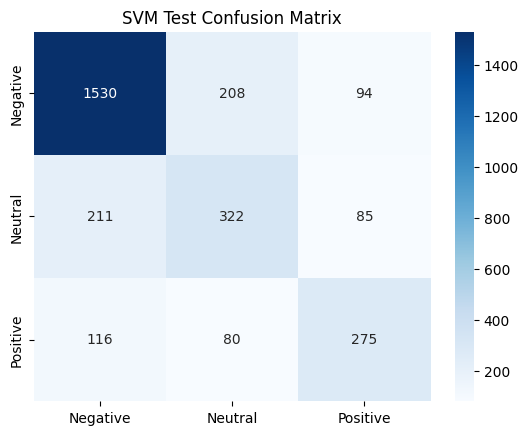

In [ ]:
print(f"\n=== Best Model ({best_model_name}) Test Performance ===")
print(f"Best CV F1-score: {best_score:.4f} \n")

y_test_pred = best_model_obj.predict(X_test_tfidf)
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title(f'{best_model_name} Test Confusion Matrix')
plt.show()

### Etapa 6

<details>
<summary><strong> Etapa 6 - Previsão em Novos Exemplos </strong> (Detalhes)</summary>

* **Criação de exemplos:** São definidos três tweets de exemplo, um para cada sentimento (positivo, negativo e neutro).
* **Pré-processamento e vetorização:**
Os tweets de exemplo são pré-processados usando a função `preprocess_text`. Os tweets pré-processados são vetorizados usando o mesmo objeto `tfidf` (TF-IDF) que foi usado para treinar o modelo.
* **Predição e confiança:** O modelo selecionado (`best_model_obj`) é usado para prever o sentimento de cada tweet de exemplo. São calculadas as probabilidades/confiança para cada classe (sentimento) usando `predict_proba`.
* **Mapeamento de sentimentos:** Os sentimentos numéricos (-1, 0, 1) são mapeados para os rótulos correspondentes (`negative`, `neutral`, `positive`).
* Mostra os resultados para cada tweet de exemplo, ao imprimir:
  * O tweet original.
  * O sentimento previsto.
  * A confiança da previsão


In [ ]:
# prever novos exemplos

# definir exemplos (um para cada sentimento)
example_tweets = [
    "Amazing service! Really enjoyed my flight.",             # positivo
    "Worst experience ever. Never flying with them again!",   # negativo
    "It was an okay flight."                                  # neutro
]

# pré-processamento e vetorização dos novos exemplos
processed_examples = [preprocess_text(tweet) for tweet in example_tweets]
example_tfidf = tfidf.transform(processed_examples)

# prever sentimento e probabilidade/confiança
predicted_sentiments = best_model_obj.predict(example_tfidf)
predicted_probs = best_model_obj.predict_proba(example_tfidf)  # Confidence scores for each class

# Mapear sentimento numérico -> string (rótulos originais)
sentiment_mapping = {-1: "negative", 0: "neutral", 1: "positive"}
for tweet, sentiment, prob in zip(example_tweets, predicted_sentiments, predicted_probs):
    confidence = max(prob)  #  maior probabilidade -> pontuação de confiança
    print(f"Tweet: {tweet}\nPredicted Sentiment: {sentiment_mapping[sentiment]}\nConfidence: {confidence:.2f}\n")

Tweet: Amazing service! Really enjoyed my flight.
Predicted Sentiment: positive
Confidence: 0.98

Tweet: Worst experience ever. Never flying with them again!
Predicted Sentiment: negative
Confidence: 1.00

Tweet: It was an okay flight.
Predicted Sentiment: neutral
Confidence: 0.58



Etapa 7

<details>
<summary><strong> Etapa 7 - Guardar novo DataFrame com predições do dataset original </strong> (Explicação)</summary>

`new_df` -> novo com predições do dataset original (contém o texto original dos tweets, o sentimento antigo, o sentimento novo e o score de confiança da nova classificação)
* Classificações iguais: 12914 (88.43%)
* Classificações diferentes: 1690 (11.57%)
  * Negativos mal identificados: 674 (4.62%)
  * Neutros mal identificados: 627 (4.29%)
  * Positivos mal identificados: 389 (2.66%)

In [ ]:
# criar novo DataFrame com previsões

# prever todo o dataset (com o melhor modelo)
X_all_tfidf = tfidf.transform(df_model['processed_text'])
pred_all = best_model_obj.predict(X_all_tfidf)
pred_all_probs = best_model_obj.predict_proba(X_all_tfidf)
confidences = [max(prob) for prob in pred_all_probs]

# mapear sentimento numérico -> string (rótulos originais)
df_model['predicted_sentiment'] = df_model['sentiment'].map(sentiment_mapping)  # original labels for reference
df_model['new_sentiment'] = [sentiment_mapping[p] for p in pred_all]
df_model['confidence_score'] = confidences


# criar novo DataFrame com os tweets, labels originais, labels novas e confidence score
new_df = df_model[['original_text', 'new_sentiment', 'confidence_score']]
new_df['old_sentiment'] = df['airline_sentiment']

new_df.head(2)

<ipython-input-54-6448b5aaf56b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['old_sentiment'] = df['airline_sentiment']


,original_text,new_sentiment,confidence_score,old_sentiment
0,@VirginAmerica What @dhepburn said.,neutral,0.853846,neutral
1,@VirginAmerica plus you've added commercials t...,positive,0.889626,positive


In [ ]:
# quantos sentimentos classificados de forma diferente

print(f"Total de linhas: {new_df.shape[0]}\n")
print(f"Classificações iguais: {new_df[new_df['new_sentiment'] == new_df['old_sentiment']].shape[0]}")
print(f"% classificações iguais: {(new_df[new_df['new_sentiment'] == new_df['old_sentiment']].shape[0] / new_df.shape[0]) * 100:.2f}% \n")
print(f"Classificações diferentes: {new_df[new_df['new_sentiment'] != new_df['old_sentiment']].shape[0]}")
print(f"% classificações diferentes: {(new_df[new_df['new_sentiment'] != new_df['old_sentiment']].shape[0] / new_df.shape[0]) * 100:.2f}%")

Total de linhas: 14604

Classificações iguais: 12914
% classificações iguais: 88.43% 

Classificações diferentes: 1690
% classificações diferentes: 11.57%


In [ ]:
# mostrar casos diferentes

new_df[new_df['new_sentiment'] != new_df['old_sentiment']]

,original_text,new_sentiment,confidence_score,old_sentiment
7,@VirginAmerica Really missed a prime opportuni...,negative,0.411577,neutral
13,@VirginAmerica @virginmedia I'm flying your #f...,neutral,0.934309,positive
23,@VirginAmerica will you be making BOS&gt;LAS n...,positive,0.831111,neutral
29,@VirginAmerica LAX to EWR - Middle seat on a r...,negative,0.872112,neutral
53,@VirginAmerica @ladygaga @carrieunderwood Juli...,positive,0.472111,neutral
...,...,...,...,...
14623,@AmericanAir Love the new planes for the JFK-L...,negative,0.994743,positive
14628,Thank you. “@AmericanAir: @jlhalldc Customer R...,negative,0.745709,positive
14634,@AmericanAir right on cue with the delays👌,neutral,0.832493,negative
14635,@AmericanAir thank you we got on a different f...,neutral,0.997562,positive


In [ ]:
# contar erros (negativo mal identificado)

print(f"Negativos mal identificados: {new_df[(new_df['new_sentiment'] == 'negative') & (new_df['old_sentiment'] != 'negative')].shape[0]}")
print(f"% Negativos mal identificados: {(new_df[(new_df['new_sentiment'] == 'negative') & (new_df['old_sentiment'] != 'negative')].shape[0] / new_df.shape[0]) * 100:.2f}% \n")
print(f"Neutros mal identificados: {new_df[(new_df['new_sentiment'] == 'neutral') & (new_df['old_sentiment'] != 'neutral')].shape[0]}")
print(f"% Neutros mal identificados: {(new_df[(new_df['new_sentiment'] == 'neutral') & (new_df['old_sentiment'] != 'neutral')].shape[0] / new_df.shape[0]) * 100:.2f}% \n")
print(f"Positivos mal identificados: {new_df[(new_df['new_sentiment'] == 'positive') & (new_df['old_sentiment'] != 'positive')].shape[0]}")
print(f"% Positivos mal identificados: {(new_df[(new_df['new_sentiment'] == 'positive') & (new_df['old_sentiment'] != 'positive')].shape[0] / new_df.shape[0]) * 100:.2f}% \n")

Negativos mal identificados: 674
% Negativos mal identificados: 4.62% 

Neutros mal identificados: 627
% Neutros mal identificados: 4.29% 

Positivos mal identificados: 389
% Positivos mal identificados: 2.66% 



In [ ]:
# identificar entradas a confirmar manualmente

new_df[new_df['confidence_score'] < 0.85]

,original_text,new_sentiment,confidence_score,old_sentiment
7,@VirginAmerica Really missed a prime opportuni...,negative,0.411577,neutral
10,@VirginAmerica did you know that suicide is th...,neutral,0.811410,neutral
11,@VirginAmerica I &lt;3 pretty graphics. so muc...,positive,0.732905,positive
19,@VirginAmerica you know what would be amazingl...,positive,0.804857,positive
23,@VirginAmerica will you be making BOS&gt;LAS n...,positive,0.831111,neutral
...,...,...,...,...
14598,@AmericanAir can you guys help me please?,neutral,0.846399,neutral
14600,http://t.co/EIw2sYb8Fu roberts&amp;s=1 @Americ...,neutral,0.581705,neutral
14602,@AmericanAir do you guys have another flight f...,neutral,0.812530,neutral
14628,Thank you. “@AmericanAir: @jlhalldc Customer R...,negative,0.745709,positive


### Resposta ao email (Parte 2): Conclusões sobre o modelo de Classificação

<details>
<summary><strong> 📤 Resposta ao email (Parte 2): Conclusões sobre o modelo de Classificação </strong> (Explicação)</summary>


Em resposta ao pedido sobre a possibilidade de desenvolver um modelo de Data Science para classificar automaticamente o sentimento de tweets, tenho o prazer de informar que sim, é possível criar um modelo eficaz para essa finalidade.

**Modelo Desenvolvido**

Foram desenvolvidos e comparados três modelos de classificação: Regressão Logística, Support Vector Machines e Random Forest. Após uma cuidadosa análise e ajuste de parâmetros, o modelo que se destacou foi o Support Vector Machines (SVM) com kernel linear.

**Desempenho do Modelo**

O modelo SVM apresentou um desempenho satisfatório, com uma taxa de acerto de 88,43% na classificação dos sentimentos. Isso significa que em 88,43% dos casos, o modelo classificou corretamente o sentimento do tweet.

**Confiabilidade do Modelo**

A confiabilidade do modelo pode ser avaliada através da taxa de sucesso e da análise dos casos em que a classificação foi diferente da original:

| Total de linhas | 14604 | 100% |
|---|---|---|
| Classificações iguais | 12914 | 88.43% |
| Classificações diferentes | 1690 | 11.57% |

**Análise das classificações diferentes:**

| Classificação diferente | Quantidade | Percentagem |
|---|---|---|
| Negativos mal identificados | 674 | 4.62% |
| Neutros mal identificados | 627 | 4.29% |
| Positivos mal identificados | 389 | 2.66% |

É possível evidenciar:
* uma **elevada taxa de sucesso** (88,43%) com 12914 classificações previstas e originais iguais;
* uma **maior dificuldade em identificar a classe negativa e neutra** (4,47% e 4,42% respetivamente), ligeiramente superior face à classe positiva (2,68%).
* a existência de uma **margem de erro** de 11,57% que, considerado o elevado volume de dados, pode ser aceitável.

Podemos concluir que o modelo é considerado **bom** e relativamente **confiável** para classificar sentimentos em tweets. Por sua vez, é necessário lembrar a margem de erro e a maior dificuldade em identificar tweets negativos e neutros. É importante desenvolver **medidas que auxiliem e complementem a implementação** do modelo.

**Sugestões para Melhoria**

Embora o modelo tenha apresentado bons resultados, existem algumas sugestões para melhorar ainda mais a sua performance:

* **Aumentar o tamanho do dataset:** Um dataset maior pode ajudar o modelo a aprender padrões mais complexos e melhorar a precisão das classificações.
* definir um **threshold para o confidence score** como **critério de aceitação das previsões**. Ou seja, definir um valor mínimo para se confiar na previsão do modelo. As classificações com `confidence_score` abaixo do valor acordado deverão ser **revistas manualmente** para **garantir maior precisão**. Deste modo, é possível equilibrar a automação proporcionada pelo modelo com a intervenção humana para casos mais complexos ou incertos.
* **Priorizar a revisão dos tweets negativos** e testar **outras técnicas** para combater o desiquilibrio das classes no dataset.
* Dentro dos tweets negativos, estar atento às **altas probabilidades de viralização**, que podem ser compreendidas com os níveis altos do confidence_score.
* Realizar uma **monitorização contínua do modelo**: O comportamento dos utilizadores no Twitter e a linguagem usada nas redes sociais podem mudar ao longo do tempo, por isso é importante monitorar o desempenho do modelo e atualizá-lo periodicamente para garantir a **precisão ao longo do tempo**. Sugerimos, ainda, continuar a comparar as previsões automáticas com as manuais, utilizando uma pequena amostra.
* **Integrar o modelo nos sistemas** de BI, CRM e outras ferramentas de automatização de tarefas, de modo a potencializar insights e otimizar tomadas de decisão.

**Conclusão**

Sim, é possível desenvolver um modelo de Data Science para classificar automaticamente o sentimento de tweets sobre a nossa airline e a nossa concorrência. O modelo apresentou bons resultados e pode ser uma ferramenta útil para monitorar a reputação das companhias aéreas e identificar tendências no mercado. No entanto, é importante ter em mente que o modelo não é perfeito e pode cometer erros, por isso é necessário monitorá-lo e atualizá-lo regularmente para garantir a sua eficácia.

Espero que esta informação seja útil. Se tiver alguma outra dúvida, não hesite em contatar!